In [1]:
%reset
# !module load texlive
import sys, os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import matplotlib
%matplotlib inline

import pickle as pk
import numpy as np
import matplotlib.pyplot as pl
pl.rc('text', usetex=False)
# Palatino
pl.rc('font', family='DejaVu Sans')
import torch

dev = torch.device("cuda")
# torch.cuda.set_device(dev)
import torch.optim as optim
from torch.distributions import MultivariateNormal
from torch.distributions import Normal
# change the root directory for this notebook

root_dir = '/mnt/home/spandey/ceph/AR_NPE/'
os.chdir(root_dir)
import colossus
import sys, os
from nf.combined_models import COMBINED_Model
from nf.all_models import *
from nf.utils_data_prep import *
from tqdm import tqdm
import pickle as pk
%load_ext autoreload
%autoreload 2




In [2]:
# ldir = '/mnt/home/spandey/ceph/AR_NPE/notebooks/SUMMARY_STATS_FIDSIMS/'
# ldir = '/mnt/home/spandey/ceph/AR_NPE/notebooks/SUMMARY_STATS_FIDSIMS_TEST_stype_uniform_cic_mtype_rockstar_200c_condsim_quijote'
# ldir = '/mnt/home/spandey/ceph/AR_NPE/notebooks/SUMMARY_STATS_FIDSIMS_TEST_stype_cic_mtype_rockstar_200c_condsim_quijote'
# ldir = '/mnt/home/spandey/ceph/AR_NPE/notebooks/SUMMARY_STATS_FIDSIMS_TEST_stype_uniform_cic_mtype_rockstar_200c_condsim_quijote'
# ldir = '/mnt/home/spandey/ceph/AR_NPE/notebooks/SUMMARY_STATS_FIDSIMS_TEST_stype_cic_mtype_rockstar_200c_condsim_fastpm'
# ldir = '/mnt/home/spandey/ceph/AR_NPE/notebooks/SUMMARY_STATS_FIDSIMS_TEST_stype_uniform_cic_mtype_rockstar_200c_condsim_fastpm_nc_8'
# ldir = '/mnt/home/spandey/ceph/AR_NPE/notebooks/CHECK_L2norm_log_SUMMARY_STATS_FIDSIMS_TEST_stype_cic_mtype_rockstar_200c_condsim_quijote_nc_4'
# ldir = '/mnt/home/spandey/ceph/AR_NPE/notebooks/SUMMARY_STATS_FIDSIMS_TEST_stype_uniform_cic_mtype_rockstar_200c_condsim_fastpm_nc_12'
ldir = '/mnt/home/spandey/ceph/AR_NPE/notebooks/LONGTRAIN_SUMMARY_STATS_FIDSIMS_TEST_stype_cic_mtype_rockstar_200c_condsim_fastpm_nc_4_wL2norm_highknots_noFOF'

isim_start = 0
isim_end = 10
isim_all = np.arange(isim_start, isim_end).astype(int)

hist_truth_all_Nhalo_allsims = []
hist_mock_all_Nhalo_allsims = []

hist_truth_low_Nhalo_allsims = []
hist_mock_low_Nhalo_allsims = []
hist_truth_mid_Nhalo_allsims = []
hist_mock_mid_Nhalo_allsims = []
hist_truth_high_Nhalo_allsims = []
hist_mock_high_Nhalo_allsims = []

for ji in tqdm(range(len(isim_all))):
    isim = isim_all[ji]
    saved = pk.load(open(ldir + '/summary_stats_jsim_' + str(isim) + '.pk', 'rb'))
    hist_truth_all_Nhalo_allsims.append(saved['hist_truth_all_Nhalo'])
    hist_mock_all_Nhalo_allsims.append(saved['hist_samp_all_Nhalo'])
    hist_truth_low_Nhalo_allsims.append(saved['hist_truth_low_Nhalo'])
    hist_mock_low_Nhalo_allsims.append(saved['hist_samp_low_Nhalo'])
    hist_truth_mid_Nhalo_allsims.append(saved['hist_truth_mid_Nhalo'])
    hist_mock_mid_Nhalo_allsims.append(saved['hist_samp_mid_Nhalo'])
    hist_truth_high_Nhalo_allsims.append(saved['hist_truth_high_Nhalo'])
    hist_mock_high_Nhalo_allsims.append(saved['hist_samp_high_Nhalo'])

bin_cents_Nhalo = saved['Nhalo_bin_cents']

# convert to numpy arrays
hist_truth_all_Nhalo_allsims = np.array(hist_truth_all_Nhalo_allsims)
hist_mock_all_Nhalo_allsims = np.array(hist_mock_all_Nhalo_allsims)
hist_truth_low_Nhalo_allsims = np.array(hist_truth_low_Nhalo_allsims)
hist_mock_low_Nhalo_allsims = np.array(hist_mock_low_Nhalo_allsims)
hist_truth_mid_Nhalo_allsims = np.array(hist_truth_mid_Nhalo_allsims)
hist_mock_mid_Nhalo_allsims = np.array(hist_mock_mid_Nhalo_allsims)
hist_truth_high_Nhalo_allsims = np.array(hist_truth_high_Nhalo_allsims)
hist_mock_high_Nhalo_allsims = np.array(hist_mock_high_Nhalo_allsims)

hist_ratio_all_Nhalo_allsims = hist_mock_all_Nhalo_allsims / hist_truth_all_Nhalo_allsims
hist_ratio_low_Nhalo_allsims = hist_mock_low_Nhalo_allsims / hist_truth_low_Nhalo_allsims
hist_ratio_mid_Nhalo_allsims = hist_mock_mid_Nhalo_allsims / hist_truth_mid_Nhalo_allsims
hist_ratio_high_Nhalo_allsims = hist_mock_high_Nhalo_allsims / hist_truth_high_Nhalo_allsims


 60%|██████    | 6/10 [00:00<00:00, 55.76it/s]

100%|██████████| 10/10 [00:00<00:00, 48.65it/s]
/tmp/ipykernel_167408/2888875511.py:50: RuntimeWarning: divide by zero encountered in divide
  hist_ratio_low_Nhalo_allsims = hist_mock_low_Nhalo_allsims / hist_truth_low_Nhalo_allsims
/tmp/ipykernel_167408/2888875511.py:50: RuntimeWarning: invalid value encountered in divide
  hist_ratio_low_Nhalo_allsims = hist_mock_low_Nhalo_allsims / hist_truth_low_Nhalo_allsims
/tmp/ipykernel_167408/2888875511.py:51: RuntimeWarning: divide by zero encountered in divide
  hist_ratio_mid_Nhalo_allsims = hist_mock_mid_Nhalo_allsims / hist_truth_mid_Nhalo_allsims


/mnt/home/spandey/ceph/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Text(0.5, 0.98, 'Number of halos histograms ')

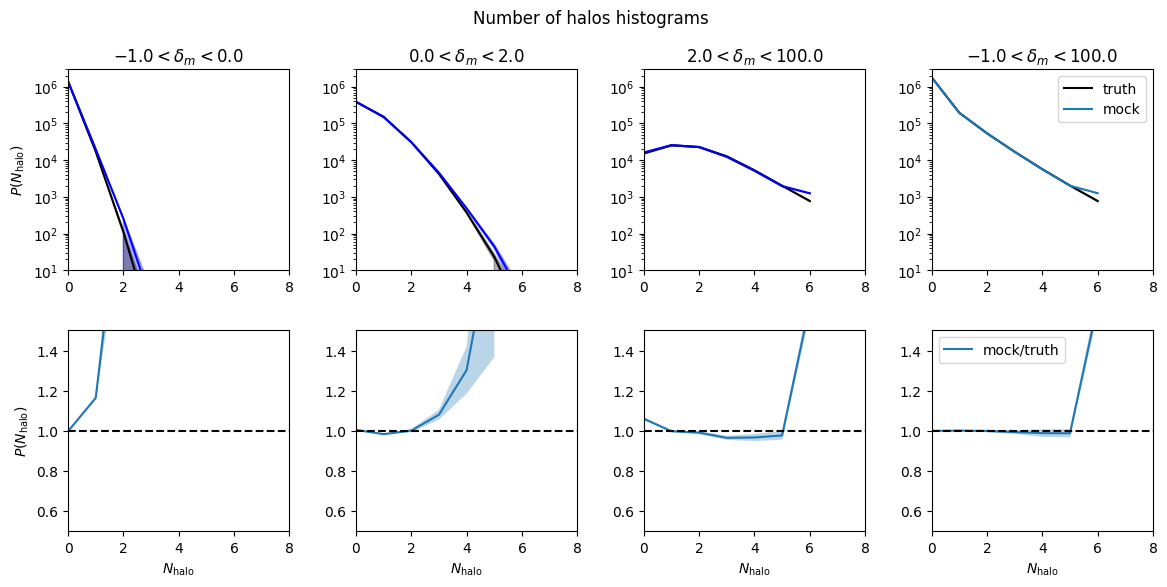

In [3]:
# make a 2 x 4 panel plot, left showing the histograms and right showing the ratio. Show the mean and std of the lines in the plots
# columns correspond to low, mid, high, all
# rows correspond to truth and mock (on left), ratio (on right)
# set figure size
pl.rcParams['figure.figsize'] = (14, 6)

pl.figure()

pl.subplots_adjust(wspace=0.3, hspace=0.3)
# share x axis among all the subplots


pl.subplot(2, 4, 1)
pl.plot(bin_cents_Nhalo, np.mean(hist_truth_low_Nhalo_allsims, axis=0), color='k', label='truth')
pl.plot(bin_cents_Nhalo, np.mean(hist_mock_low_Nhalo_allsims, axis=0), color='b', label='mock')
pl.fill_between(bin_cents_Nhalo, np.mean(hist_mock_low_Nhalo_allsims, axis=0) - np.std(hist_mock_low_Nhalo_allsims, axis=0), np.mean(hist_mock_low_Nhalo_allsims, axis=0) + np.std(hist_mock_low_Nhalo_allsims, axis=0), color='b', alpha=0.3)
pl.fill_between(bin_cents_Nhalo, np.mean(hist_truth_low_Nhalo_allsims, axis=0) - np.std(hist_truth_low_Nhalo_allsims, axis=0), np.mean(hist_truth_low_Nhalo_allsims, axis=0) + np.std(hist_truth_low_Nhalo_allsims, axis=0), color='k', alpha=0.3)
# pl.legend()
# pl.xlabel(r'$N_{\rm halo}$')
pl.ylabel(r'$P(N_{\rm halo})$')
pl.yscale('log')
pl.ylim(10,3e6)
pl.xlim(0, 8)
pl.title(r'$-1.0 < \delta_m < 0.0$')
pl.subplot(2, 4, 2)
pl.plot(bin_cents_Nhalo, np.mean(hist_truth_mid_Nhalo_allsims, axis=0), color='k', label='truth')
pl.plot(bin_cents_Nhalo, np.mean(hist_mock_mid_Nhalo_allsims, axis=0), color='b', label='mock')
pl.fill_between(bin_cents_Nhalo, np.mean(hist_mock_mid_Nhalo_allsims, axis=0) - np.std(hist_mock_mid_Nhalo_allsims, axis=0), np.mean(hist_mock_mid_Nhalo_allsims, axis=0) + np.std(hist_mock_mid_Nhalo_allsims, axis=0), color='b', alpha=0.3)
pl.fill_between(bin_cents_Nhalo, np.mean(hist_truth_mid_Nhalo_allsims, axis=0) - np.std(hist_truth_mid_Nhalo_allsims, axis=0), np.mean(hist_truth_mid_Nhalo_allsims, axis=0) + np.std(hist_truth_mid_Nhalo_allsims, axis=0), color='k', alpha=0.3)
# pl.legend()
pl.yscale('log')
pl.ylim(10,3e6)
pl.xlim(0, 8)
# pl.xlabel(r'$N_{\rm halo}$')
# pl.ylabel(r'$P(N_{\rm halo})$')
pl.title(r'$0.0 < \delta_m < 2.0$')
pl.subplot(2, 4, 3)
pl.plot(bin_cents_Nhalo, np.mean(hist_truth_high_Nhalo_allsims, axis=0), color='k', label='truth')
pl.plot(bin_cents_Nhalo, np.mean(hist_mock_high_Nhalo_allsims, axis=0), color='b', label='mock')
pl.fill_between(bin_cents_Nhalo, np.mean(hist_mock_high_Nhalo_allsims, axis=0) - np.std(hist_mock_high_Nhalo_allsims, axis=0), np.mean(hist_mock_high_Nhalo_allsims, axis=0) + np.std(hist_mock_high_Nhalo_allsims, axis=0), color='b', alpha=0.3)
pl.fill_between(bin_cents_Nhalo, np.mean(hist_truth_high_Nhalo_allsims, axis=0) - np.std(hist_truth_high_Nhalo_allsims, axis=0), np.mean(hist_truth_high_Nhalo_allsims, axis=0) + np.std(hist_truth_high_Nhalo_allsims, axis=0), color='k', alpha=0.3)
# pl.legend()
pl.yscale('log')
pl.ylim(10,3e6)
pl.xlim(0, 8)
# pl.xlabel(r'$N_{\rm halo}$')
# pl.ylabel(r'$P(N_{\rm halo})$')
pl.title(r'$2.0 < \delta_m < 100.0$')
pl.subplot(2, 4, 4)
pl.plot(bin_cents_Nhalo, np.mean(hist_truth_all_Nhalo_allsims, axis=0), color='k', label='truth')
pl.plot(bin_cents_Nhalo, np.mean(hist_mock_all_Nhalo_allsims, axis=0), label='mock')
pl.fill_between(bin_cents_Nhalo, np.mean(hist_mock_all_Nhalo_allsims, axis=0) - np.std(hist_mock_all_Nhalo_allsims, axis=0), np.mean(hist_mock_all_Nhalo_allsims, axis=0) + np.std(hist_mock_all_Nhalo_allsims, axis=0), alpha=0.3)
pl.fill_between(bin_cents_Nhalo, np.mean(hist_truth_all_Nhalo_allsims, axis=0) - np.std(hist_truth_all_Nhalo_allsims, axis=0), np.mean(hist_truth_all_Nhalo_allsims, axis=0) + np.std(hist_truth_all_Nhalo_allsims, axis=0), color='k', alpha=0.3)
pl.legend()
pl.yscale('log')
pl.ylim(10,3e6)
pl.xlim(0, 8)
# pl.xlabel(r'$N_{\rm halo}$')
# pl.ylabel(r'$P(N_{\rm halo})$')
pl.title(r'$-1.0 < \delta_m < 100.0$')

pl.subplot(2, 4, 5)
pl.plot(bin_cents_Nhalo, np.mean(hist_ratio_low_Nhalo_allsims, axis=0), label='mock/truth')
pl.fill_between(bin_cents_Nhalo, np.mean(hist_ratio_low_Nhalo_allsims, axis=0) - np.std(hist_ratio_low_Nhalo_allsims, axis=0), np.mean(hist_ratio_low_Nhalo_allsims, axis=0) + np.std(hist_ratio_low_Nhalo_allsims, axis=0), alpha=0.3)
# pl.legend()
pl.xlabel(r'$N_{\rm halo}$')
pl.ylim(0.5, 1.5)
pl.xlim(0, 8)
pl.axhline(1, color='k', linestyle='--')
pl.ylabel(r'$P(N_{\rm halo})$')
# pl.title(r'Low $N_{\rm halo}$')
pl.subplot(2, 4, 6)
pl.plot(bin_cents_Nhalo, np.mean(hist_ratio_mid_Nhalo_allsims, axis=0), label='mock/truth')
pl.fill_between(bin_cents_Nhalo, np.mean(hist_ratio_mid_Nhalo_allsims, axis=0) - np.std(hist_ratio_mid_Nhalo_allsims, axis=0), np.mean(hist_ratio_mid_Nhalo_allsims, axis=0) + np.std(hist_ratio_mid_Nhalo_allsims, axis=0), alpha=0.3)
# pl.legend()
pl.xlabel(r'$N_{\rm halo}$')
pl.ylim(0.5, 1.5)
pl.xlim(0, 8)
pl.axhline(1, color='k', linestyle='--')

# pl.ylabel(r'$P(N_{\rm halo})$')
# pl.title(r'Mid $N_{\rm halo}$')
pl.subplot(2, 4, 7)
pl.plot(bin_cents_Nhalo, np.mean(hist_ratio_high_Nhalo_allsims, axis=0), label='mock/truth')
pl.fill_between(bin_cents_Nhalo, np.mean(hist_ratio_high_Nhalo_allsims, axis=0) - np.std(hist_ratio_high_Nhalo_allsims, axis=0), np.mean(hist_ratio_high_Nhalo_allsims, axis=0) + np.std(hist_ratio_high_Nhalo_allsims, axis=0), alpha=0.3)
# pl.legend()
pl.xlabel(r'$N_{\rm halo}$')
pl.ylim(0.5, 1.5)
pl.xlim(0, 8)
pl.axhline(1, color='k', linestyle='--')

# pl.ylabel(r'$P(N_{\rm halo})$')
# pl.title(r'High $N_{\rm halo}$')
pl.subplot(2, 4, 8)
pl.plot(bin_cents_Nhalo, np.mean(hist_ratio_all_Nhalo_allsims, axis=0), label='mock/truth')
pl.fill_between(bin_cents_Nhalo, np.mean(hist_ratio_all_Nhalo_allsims, axis=0) - np.std(hist_ratio_all_Nhalo_allsims, axis=0), np.mean(hist_ratio_all_Nhalo_allsims, axis=0) + np.std(hist_ratio_all_Nhalo_allsims, axis=0), alpha=0.3)
pl.legend()
pl.xlabel(r'$N_{\rm halo}$')
pl.ylim(0.5, 1.5)
pl.xlim(0, 8)
pl.axhline(1, color='k', linestyle='--')

# pl.ylabel(r'$P(N_{\rm halo})$')
# pl.title(r'All $N_{\rm halo}$')
pl.suptitle('Number of halos histograms ')



In [4]:
# ldir = '/mnt/home/spandey/ceph/AR_NPE/notebooks/SUMMARY_STATS_FIDSIMS/'
# isim_start = 1
# isim_end = 11
# isim_all = np.arange(isim_start, isim_end).astype(int)

hist_truth_all_Mhalo_allsims = []
hist_mock_all_Mhalo_allsims = []

hist_truth_low_Mhalo_allsims = []
hist_mock_low_Mhalo_allsims = []
hist_truth_mid_Mhalo_allsims = []
hist_mock_mid_Mhalo_allsims = []
hist_truth_high_Mhalo_allsims = []
hist_mock_high_Mhalo_allsims = []

for ji in tqdm(range(len(isim_all))):
    isim = isim_all[ji]
    saved = pk.load(open(ldir + '/summary_stats_jsim_' + str(isim) + '.pk', 'rb'))
    hist_truth_all_Mhalo_allsims.append(saved['hist_truth_all_Mhalo'])
    hist_mock_all_Mhalo_allsims.append(saved['hist_samp_all_Mhalo'])
    hist_truth_low_Mhalo_allsims.append(saved['hist_truth_low_Mhalo'])
    hist_mock_low_Mhalo_allsims.append(saved['hist_samp_low_Mhalo'])
    hist_truth_mid_Mhalo_allsims.append(saved['hist_truth_mid_Mhalo'])
    hist_mock_mid_Mhalo_allsims.append(saved['hist_samp_mid_Mhalo'])
    hist_truth_high_Mhalo_allsims.append(saved['hist_truth_high_Mhalo'])
    hist_mock_high_Mhalo_allsims.append(saved['hist_samp_high_Mhalo'])

bin_cents_Mhalo = saved['Mhalo_bin_cents']

# convert to numpy arrays
hist_truth_all_Mhalo_allsims = np.array(hist_truth_all_Mhalo_allsims)
hist_mock_all_Mhalo_allsims = np.array(hist_mock_all_Mhalo_allsims)
hist_truth_low_Mhalo_allsims = np.array(hist_truth_low_Mhalo_allsims)
hist_mock_low_Mhalo_allsims = np.array(hist_mock_low_Mhalo_allsims)
hist_truth_mid_Mhalo_allsims = np.array(hist_truth_mid_Mhalo_allsims)
hist_mock_mid_Mhalo_allsims = np.array(hist_mock_mid_Mhalo_allsims)
hist_truth_high_Mhalo_allsims = np.array(hist_truth_high_Mhalo_allsims)
hist_mock_high_Mhalo_allsims = np.array(hist_mock_high_Mhalo_allsims)

hist_ratio_all_Mhalo_allsims = hist_mock_all_Mhalo_allsims / hist_truth_all_Mhalo_allsims
hist_ratio_low_Mhalo_allsims = hist_mock_low_Mhalo_allsims / hist_truth_low_Mhalo_allsims
hist_ratio_mid_Mhalo_allsims = hist_mock_mid_Mhalo_allsims / hist_truth_mid_Mhalo_allsims
hist_ratio_high_Mhalo_allsims = hist_mock_high_Mhalo_allsims / hist_truth_high_Mhalo_allsims


100%|██████████| 10/10 [00:00<00:00, 1406.78it/s]
/tmp/ipykernel_167408/4130557577.py:40: RuntimeWarning: divide by zero encountered in divide
  hist_ratio_all_Mhalo_allsims = hist_mock_all_Mhalo_allsims / hist_truth_all_Mhalo_allsims
/tmp/ipykernel_167408/4130557577.py:40: RuntimeWarning: invalid value encountered in divide
  hist_ratio_all_Mhalo_allsims = hist_mock_all_Mhalo_allsims / hist_truth_all_Mhalo_allsims
/tmp/ipykernel_167408/4130557577.py:41: RuntimeWarning: divide by zero encountered in divide
  hist_ratio_low_Mhalo_allsims = hist_mock_low_Mhalo_allsims / hist_truth_low_Mhalo_allsims
/tmp/ipykernel_167408/4130557577.py:41: RuntimeWarning: invalid value encountered in divide
  hist_ratio_low_Mhalo_allsims = hist_mock_low_Mhalo_allsims / hist_truth_low_Mhalo_allsims
/tmp/ipykernel_167408/4130557577.py:42: RuntimeWarning: divide by zero encountered in divide
  hist_ratio_mid_Mhalo_allsims = hist_mock_mid_Mhalo_allsims / hist_truth_mid_Mhalo_allsims
/tmp/ipykernel_167408/41305

In [5]:
hist_ratio_all_Mhalo_allsims.shape


(10, 7, 18)

Text(0.5, 0.98, 'Heaviest halo mass histograms')

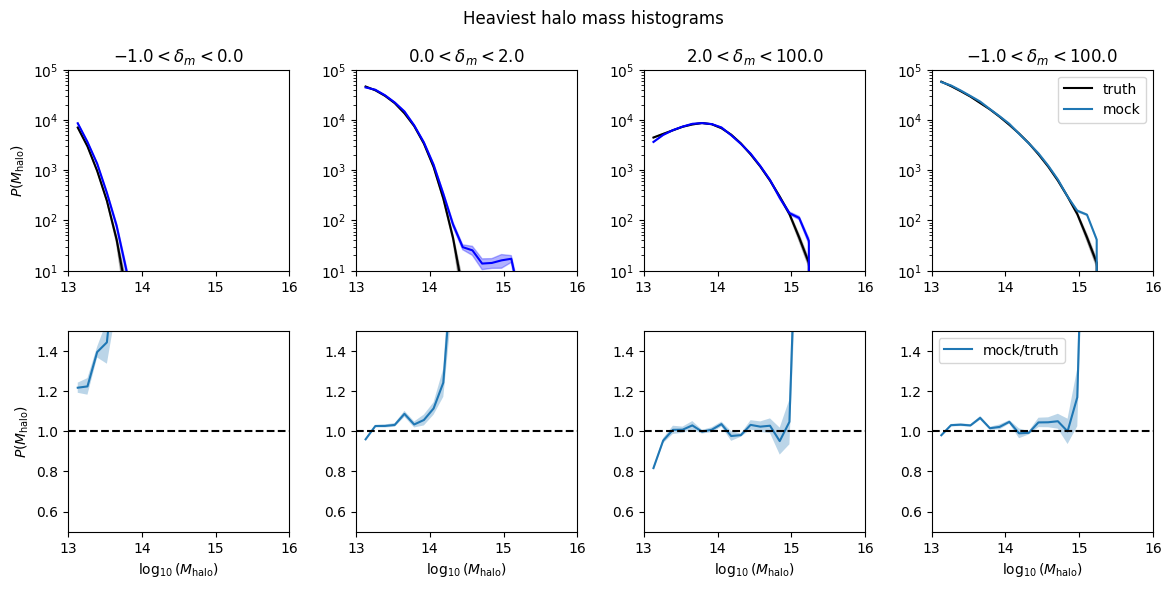

In [6]:
# make a 2 x 4 panel plot, left showing the histograms and right showing the ratio. Show the mean and std of the lines in the plots
# columns correspond to low, mid, high, all
# rows correspond to truth and mock (on left), ratio (on right)
# set figure size
pl.rcParams['figure.figsize'] = (14, 6)

jM = 0
pl.figure()

pl.subplots_adjust(wspace=0.3, hspace=0.3)
# share x axis among all the subplots
xlim_min = 13.0
xlim_max = 16.0


pl.subplot(2, 4, 1)
pl.plot(bin_cents_Mhalo, np.mean(hist_truth_low_Mhalo_allsims, axis=0)[jM,:], color='k', label='truth')
pl.plot(bin_cents_Mhalo, np.mean(hist_mock_low_Mhalo_allsims, axis=0)[jM,:], color='b', label='mock')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_mock_low_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_low_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_low_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_low_Mhalo_allsims, axis=0)[jM,:], color='b', alpha=0.3)
pl.fill_between(bin_cents_Mhalo, np.mean(hist_truth_low_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_truth_low_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_truth_low_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_truth_low_Mhalo_allsims, axis=0)[jM,:], color='k', alpha=0.3)
# pl.legend()
# pl.xlabel(r'$N_{\rm halo}$')
pl.ylabel(r'$P(M_{\rm halo})$')
pl.yscale('log')
pl.ylim(10,1e5)
pl.xlim(xlim_min, xlim_max)
pl.title(r'$-1.0 < \delta_m < 0.0$')
pl.subplot(2, 4, 2)
pl.plot(bin_cents_Mhalo, np.mean(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:], color='k', label='truth')
pl.plot(bin_cents_Mhalo, np.mean(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:], color='b', label='mock')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:], color='b', alpha=0.3)
pl.fill_between(bin_cents_Mhalo, np.mean(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:], color='k', alpha=0.3)
# pl.legend()
pl.yscale('log')
pl.ylim(10,1e5)
pl.xlim(xlim_min, xlim_max)
# pl.xlabel(r'$N_{\rm halo}$')
# pl.ylabel(r'$P(N_{\rm halo})$')
pl.title(r'$0.0 < \delta_m < 2.0$')
pl.subplot(2, 4, 3)
pl.plot(bin_cents_Mhalo, np.mean(hist_truth_high_Mhalo_allsims, axis=0)[jM,:], color='k', label='truth')
pl.plot(bin_cents_Mhalo, np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], color='b', label='mock')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], color='b', alpha=0.3)
pl.fill_between(bin_cents_Mhalo, np.mean(hist_truth_high_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_truth_high_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_truth_high_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_truth_high_Mhalo_allsims, axis=0)[jM,:], color='k', alpha=0.3)
# pl.legend()
pl.yscale('log')
pl.ylim(10,1e5)
pl.xlim(xlim_min, xlim_max)
# pl.xlabel(r'$N_{\rm halo}$')
# pl.ylabel(r'$P(N_{\rm halo})$')
pl.title(r'$2.0 < \delta_m < 100.0$')
pl.subplot(2, 4, 4)
pl.plot(bin_cents_Mhalo, np.mean(hist_truth_all_Mhalo_allsims, axis=0)[jM,:], color='k', label='truth')
pl.plot(bin_cents_Mhalo, np.mean(hist_mock_all_Mhalo_allsims, axis=0)[jM,:], label='mock')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_mock_all_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_all_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_all_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_all_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
pl.fill_between(bin_cents_Mhalo, np.mean(hist_truth_all_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_truth_all_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_truth_all_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_truth_all_Mhalo_allsims, axis=0)[jM,:], color='k', alpha=0.3)
pl.legend()
pl.yscale('log')
pl.ylim(10,1e5)
pl.xlim(xlim_min, xlim_max)
pl.title(r'$-1.0 < \delta_m < 100.0$')

pl.subplot(2, 4, 5)
pl.plot(bin_cents_Mhalo, np.mean(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:], label='mock/truth')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
# pl.legend()
pl.xlabel(r'$\log_{10}(M_{\rm halo})$')
pl.ylim(0.5, 1.5)
pl.xlim(xlim_min, xlim_max)
pl.axhline(1, color='k', linestyle='--')
pl.ylabel(r'$P(M_{\rm halo})$')
pl.subplot(2, 4, 6)
pl.plot(bin_cents_Mhalo, np.mean(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:], label='mock/truth')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
# pl.legend()
pl.xlabel(r'$\log_{10}(M_{\rm halo})$')
pl.ylim(0.5, 1.5)
pl.xlim(xlim_min, xlim_max)
pl.axhline(1, color='k', linestyle='--')

pl.subplot(2, 4, 7)
pl.plot(bin_cents_Mhalo, np.mean(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:], label='mock/truth')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
# pl.legend()
pl.xlabel(r'$\log_{10}(M_{\rm halo})$')
pl.ylim(0.5, 1.5)
pl.xlim(xlim_min, xlim_max)
pl.axhline(1, color='k', linestyle='--')

pl.subplot(2, 4, 8)
pl.plot(bin_cents_Mhalo, np.mean(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:], label='mock/truth')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
pl.legend()
pl.xlabel(r'$\log_{10}(M_{\rm halo})$')
pl.ylim(0.5, 1.5)
pl.xlim(xlim_min, xlim_max)
pl.axhline(1, color='k', linestyle='--')

# pl.ylabel(r'$P(N_{\rm halo})$')
# pl.title(r'All $N_{\rm halo}$')
pl.suptitle('Heaviest halo mass histograms')



Text(0.5, 0.98, 'Second heaviest halo mass histograms')

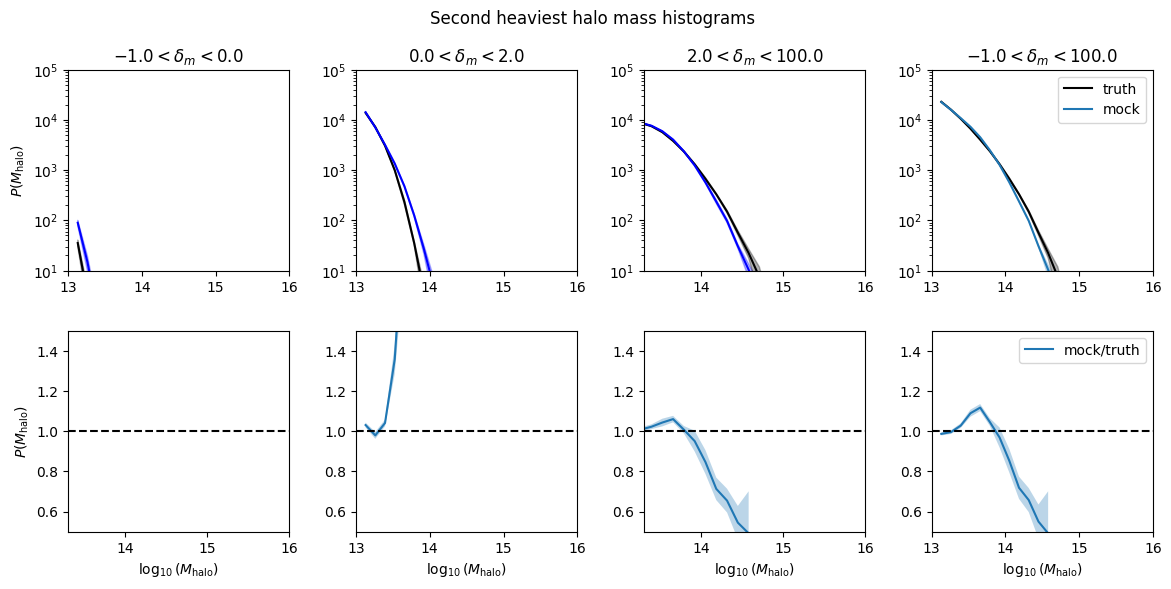

In [7]:
# make a 2 x 4 panel plot, left showing the histograms and right showing the ratio. Show the mean and std of the lines in the plots
# columns correspond to low, mid, high, all
# rows correspond to truth and mock (on left), ratio (on right)
# set figure size
pl.rcParams['figure.figsize'] = (14, 6)

jM = 1
pl.figure()

pl.subplots_adjust(wspace=0.3, hspace=0.3)
# share x axis among all the subplots
xlim_min = 13.0
xlim_max = 16.0

pl.subplot(2, 4, 1)
pl.plot(bin_cents_Mhalo, np.mean(hist_truth_low_Mhalo_allsims, axis=0)[jM,:], color='k', label='truth')
pl.plot(bin_cents_Mhalo, np.mean(hist_mock_low_Mhalo_allsims, axis=0)[jM,:], color='b', label='mock')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_mock_low_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_low_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_low_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_low_Mhalo_allsims, axis=0)[jM,:], color='b', alpha=0.3)
pl.fill_between(bin_cents_Mhalo, np.mean(hist_truth_low_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_truth_low_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_truth_low_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_truth_low_Mhalo_allsims, axis=0)[jM,:], color='k', alpha=0.3)
# pl.legend()
# pl.xlabel(r'$N_{\rm halo}$')
pl.ylabel(r'$P(M_{\rm halo})$')
pl.yscale('log')
pl.ylim(10,1e5)
pl.xlim(xlim_min, xlim_max)
pl.title(r'$-1.0 < \delta_m < 0.0$')
pl.subplot(2, 4, 2)
pl.plot(bin_cents_Mhalo, np.mean(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:], color='k', label='truth')
pl.plot(bin_cents_Mhalo, np.mean(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:], color='b', label='mock')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:], color='b', alpha=0.3)
pl.fill_between(bin_cents_Mhalo, np.mean(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:], color='k', alpha=0.3)
# pl.legend()
pl.yscale('log')
pl.ylim(10,1e5)
pl.xlim(xlim_min, xlim_max)
# pl.xlabel(r'$N_{\rm halo}$')
# pl.ylabel(r'$P(N_{\rm halo})$')
pl.title(r'$0.0 < \delta_m < 2.0$')
pl.subplot(2, 4, 3)
pl.plot(bin_cents_Mhalo, np.mean(hist_truth_high_Mhalo_allsims, axis=0)[jM,:], color='k', label='truth')
pl.plot(bin_cents_Mhalo, np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], color='b', label='mock')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], color='b', alpha=0.3)
pl.fill_between(bin_cents_Mhalo, np.mean(hist_truth_high_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_truth_high_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_truth_high_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_truth_high_Mhalo_allsims, axis=0)[jM,:], color='k', alpha=0.3)
# pl.legend()
pl.yscale('log')
pl.ylim(10,1e5)
pl.xlim(13.3, 16.0)
# pl.xlabel(r'$N_{\rm halo}$')
# pl.ylabel(r'$P(N_{\rm halo})$')
pl.title(r'$2.0 < \delta_m < 100.0$')
pl.subplot(2, 4, 4)
pl.plot(bin_cents_Mhalo, np.mean(hist_truth_all_Mhalo_allsims, axis=0)[jM,:], color='k', label='truth')
pl.plot(bin_cents_Mhalo, np.mean(hist_mock_all_Mhalo_allsims, axis=0)[jM,:], label='mock')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_mock_all_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_all_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_all_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_all_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
pl.fill_between(bin_cents_Mhalo, np.mean(hist_truth_all_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_truth_all_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_truth_all_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_truth_all_Mhalo_allsims, axis=0)[jM,:], color='k', alpha=0.3)
pl.legend()
pl.yscale('log')
pl.ylim(10,1e5)
pl.xlim(xlim_min, xlim_max)
pl.title(r'$-1.0 < \delta_m < 100.0$')

pl.subplot(2, 4, 5)
pl.plot(bin_cents_Mhalo, np.mean(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:], label='mock/truth')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
# pl.legend()
pl.xlabel(r'$\log_{10}(M_{\rm halo})$')
pl.ylim(0.5, 1.5)
pl.xlim(13.3, 16.0)
pl.axhline(1, color='k', linestyle='--')
pl.ylabel(r'$P(M_{\rm halo})$')
pl.subplot(2, 4, 6)
pl.plot(bin_cents_Mhalo, np.mean(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:], label='mock/truth')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
# pl.legend()
pl.xlabel(r'$\log_{10}(M_{\rm halo})$')
pl.ylim(0.5, 1.5)
pl.xlim(xlim_min, xlim_max)
pl.axhline(1, color='k', linestyle='--')

pl.subplot(2, 4, 7)
pl.plot(bin_cents_Mhalo, np.mean(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:], label='mock/truth')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
# pl.legend()
pl.xlabel(r'$\log_{10}(M_{\rm halo})$')
pl.ylim(0.5, 1.5)
pl.xlim(13.3, 16.0)
pl.axhline(1, color='k', linestyle='--')

pl.subplot(2, 4, 8)
pl.plot(bin_cents_Mhalo, np.mean(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:], label='mock/truth')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
pl.legend()
pl.xlabel(r'$\log_{10}(M_{\rm halo})$')
pl.ylim(0.5, 1.5)
pl.xlim(xlim_min, xlim_max)
pl.axhline(1, color='k', linestyle='--')

# pl.ylabel(r'$P(N_{\rm halo})$')
# pl.title(r'All $N_{\rm halo}$')
pl.suptitle('Second heaviest halo mass histograms')


Text(0.5, 0.98, 'Third heaviest halo mass histograms')

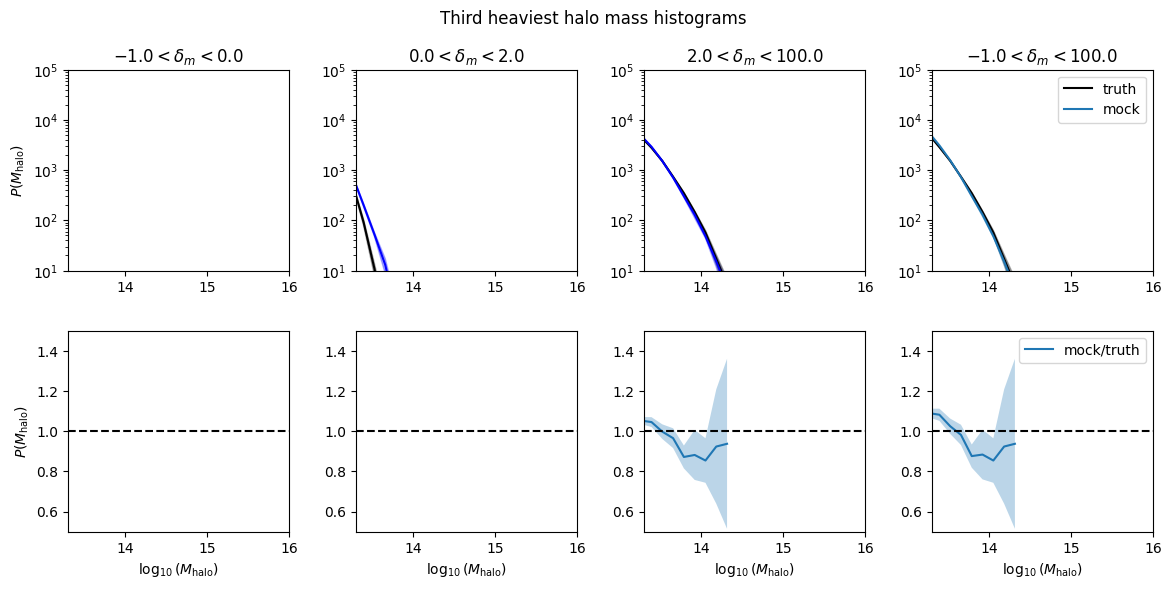

In [8]:
# make a 2 x 4 panel plot, left showing the histograms and right showing the ratio. Show the mean and std of the lines in the plots
# columns correspond to low, mid, high, all
# rows correspond to truth and mock (on left), ratio (on right)
# set figure size
pl.rcParams['figure.figsize'] = (14, 6)

jM = 2
pl.figure()

pl.subplots_adjust(wspace=0.3, hspace=0.3)
# share x axis among all the subplots


pl.subplot(2, 4, 1)
pl.plot(bin_cents_Mhalo, np.mean(hist_truth_low_Mhalo_allsims, axis=0)[jM,:], color='k', label='truth')
pl.plot(bin_cents_Mhalo, np.mean(hist_mock_low_Mhalo_allsims, axis=0)[jM,:], color='b', label='mock')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_mock_low_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_low_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_low_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_low_Mhalo_allsims, axis=0)[jM,:], color='b', alpha=0.3)
pl.fill_between(bin_cents_Mhalo, np.mean(hist_truth_low_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_truth_low_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_truth_low_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_truth_low_Mhalo_allsims, axis=0)[jM,:], color='k', alpha=0.3)
# pl.legend()
# pl.xlabel(r'$N_{\rm halo}$')
pl.ylabel(r'$P(M_{\rm halo})$')
pl.yscale('log')
pl.ylim(10,1e5)
pl.xlim(13.3, 16.0)
pl.title(r'$-1.0 < \delta_m < 0.0$')
pl.subplot(2, 4, 2)
pl.plot(bin_cents_Mhalo, np.mean(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:], color='k', label='truth')
pl.plot(bin_cents_Mhalo, np.mean(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:], color='b', label='mock')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:], color='b', alpha=0.3)
pl.fill_between(bin_cents_Mhalo, np.mean(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:], color='k', alpha=0.3)
# pl.legend()
pl.yscale('log')
pl.ylim(10,1e5)
pl.xlim(13.3, 16.0)
# pl.xlabel(r'$N_{\rm halo}$')
# pl.ylabel(r'$P(N_{\rm halo})$')
pl.title(r'$0.0 < \delta_m < 2.0$')
pl.subplot(2, 4, 3)
pl.plot(bin_cents_Mhalo, np.mean(hist_truth_high_Mhalo_allsims, axis=0)[jM,:], color='k', label='truth')
pl.plot(bin_cents_Mhalo, np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], color='b', label='mock')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], color='b', alpha=0.3)
pl.fill_between(bin_cents_Mhalo, np.mean(hist_truth_high_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_truth_high_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_truth_high_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_truth_high_Mhalo_allsims, axis=0)[jM,:], color='k', alpha=0.3)
# pl.legend()
pl.yscale('log')
pl.ylim(10,1e5)
pl.xlim(13.3, 16.0)
# pl.xlabel(r'$N_{\rm halo}$')
# pl.ylabel(r'$P(N_{\rm halo})$')
pl.title(r'$2.0 < \delta_m < 100.0$')
pl.subplot(2, 4, 4)
pl.plot(bin_cents_Mhalo, np.mean(hist_truth_all_Mhalo_allsims, axis=0)[jM,:], color='k', label='truth')
pl.plot(bin_cents_Mhalo, np.mean(hist_mock_all_Mhalo_allsims, axis=0)[jM,:], label='mock')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_mock_all_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_all_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_all_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_all_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
pl.fill_between(bin_cents_Mhalo, np.mean(hist_truth_all_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_truth_all_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_truth_all_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_truth_all_Mhalo_allsims, axis=0)[jM,:], color='k', alpha=0.3)
pl.legend()
pl.yscale('log')
pl.ylim(10,1e5)
pl.xlim(13.3, 16.0)
pl.title(r'$-1.0 < \delta_m < 100.0$')

pl.subplot(2, 4, 5)
pl.plot(bin_cents_Mhalo, np.mean(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:], label='mock/truth')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
# pl.legend()
pl.xlabel(r'$\log_{10}(M_{\rm halo})$')
pl.ylim(0.5, 1.5)
pl.xlim(13.3, 16.0)
pl.axhline(1, color='k', linestyle='--')
pl.ylabel(r'$P(M_{\rm halo})$')
pl.subplot(2, 4, 6)
pl.plot(bin_cents_Mhalo, np.mean(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:], label='mock/truth')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
# pl.legend()
pl.xlabel(r'$\log_{10}(M_{\rm halo})$')
pl.ylim(0.5, 1.5)
pl.xlim(13.3, 16.0)
pl.axhline(1, color='k', linestyle='--')

pl.subplot(2, 4, 7)
pl.plot(bin_cents_Mhalo, np.mean(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:], label='mock/truth')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
# pl.legend()
pl.xlabel(r'$\log_{10}(M_{\rm halo})$')
pl.ylim(0.5, 1.5)
pl.xlim(13.3, 16.0)
pl.axhline(1, color='k', linestyle='--')

pl.subplot(2, 4, 8)
pl.plot(bin_cents_Mhalo, np.mean(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:], label='mock/truth')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
pl.legend()
pl.xlabel(r'$\log_{10}(M_{\rm halo})$')
pl.ylim(0.5, 1.5)
pl.xlim(13.3, 16.0)
pl.axhline(1, color='k', linestyle='--')

# pl.ylabel(r'$P(N_{\rm halo})$')
# pl.title(r'All $N_{\rm halo}$')
pl.suptitle('Third heaviest halo mass histograms')



/tmp/ipykernel_167408/3591282361.py:22: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  pl.yscale('log')


Text(0.5, 0.98, 'Fourth heaviest halo mass histograms')

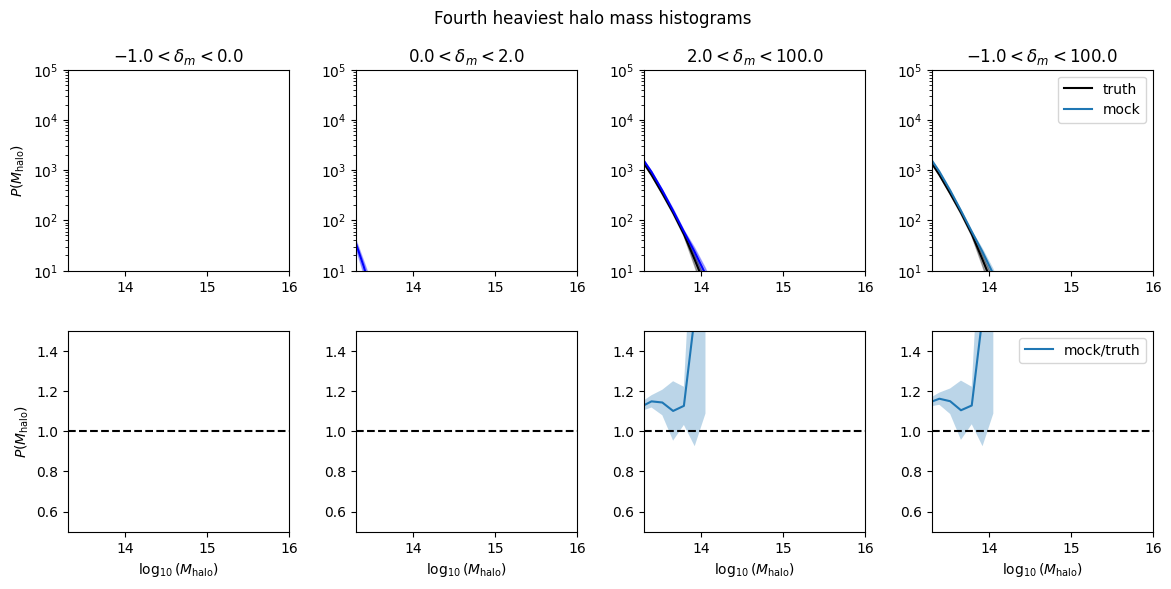

In [9]:
# make a 2 x 4 panel plot, left showing the histograms and right showing the ratio. Show the mean and std of the lines in the plots
# columns correspond to low, mid, high, all
# rows correspond to truth and mock (on left), ratio (on right)
# set figure size
pl.rcParams['figure.figsize'] = (14, 6)

jM = 3
pl.figure()

pl.subplots_adjust(wspace=0.3, hspace=0.3)
# share x axis among all the subplots


pl.subplot(2, 4, 1)
pl.plot(bin_cents_Mhalo, np.mean(hist_truth_low_Mhalo_allsims, axis=0)[jM,:], color='k', label='truth')
pl.plot(bin_cents_Mhalo, np.mean(hist_mock_low_Mhalo_allsims, axis=0)[jM,:], color='b', label='mock')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_mock_low_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_low_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_low_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_low_Mhalo_allsims, axis=0)[jM,:], color='b', alpha=0.3)
pl.fill_between(bin_cents_Mhalo, np.mean(hist_truth_low_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_truth_low_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_truth_low_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_truth_low_Mhalo_allsims, axis=0)[jM,:], color='k', alpha=0.3)
# pl.legend()
# pl.xlabel(r'$N_{\rm halo}$')
pl.ylabel(r'$P(M_{\rm halo})$')
pl.yscale('log')
pl.ylim(10,1e5)
pl.xlim(13.3, 16.0)
pl.title(r'$-1.0 < \delta_m < 0.0$')
pl.subplot(2, 4, 2)
pl.plot(bin_cents_Mhalo, np.mean(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:], color='k', label='truth')
pl.plot(bin_cents_Mhalo, np.mean(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:], color='b', label='mock')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:], color='b', alpha=0.3)
pl.fill_between(bin_cents_Mhalo, np.mean(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:], color='k', alpha=0.3)
# pl.legend()
pl.yscale('log')
pl.ylim(10,1e5)
pl.xlim(13.3, 16.0)
# pl.xlabel(r'$N_{\rm halo}$')
# pl.ylabel(r'$P(N_{\rm halo})$')
pl.title(r'$0.0 < \delta_m < 2.0$')
pl.subplot(2, 4, 3)
pl.plot(bin_cents_Mhalo, np.mean(hist_truth_high_Mhalo_allsims, axis=0)[jM,:], color='k', label='truth')
pl.plot(bin_cents_Mhalo, np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], color='b', label='mock')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], color='b', alpha=0.3)
pl.fill_between(bin_cents_Mhalo, np.mean(hist_truth_high_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_truth_high_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_truth_high_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_truth_high_Mhalo_allsims, axis=0)[jM,:], color='k', alpha=0.3)
# pl.legend()
pl.yscale('log')
pl.ylim(10,1e5)
pl.xlim(13.3, 16.0)
# pl.xlabel(r'$N_{\rm halo}$')
# pl.ylabel(r'$P(N_{\rm halo})$')
pl.title(r'$2.0 < \delta_m < 100.0$')
pl.subplot(2, 4, 4)
pl.plot(bin_cents_Mhalo, np.mean(hist_truth_all_Mhalo_allsims, axis=0)[jM,:], color='k', label='truth')
pl.plot(bin_cents_Mhalo, np.mean(hist_mock_all_Mhalo_allsims, axis=0)[jM,:], label='mock')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_mock_all_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_all_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_all_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_all_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
pl.fill_between(bin_cents_Mhalo, np.mean(hist_truth_all_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_truth_all_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_truth_all_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_truth_all_Mhalo_allsims, axis=0)[jM,:], color='k', alpha=0.3)
pl.legend()
pl.yscale('log')
pl.ylim(10,1e5)
pl.xlim(13.3, 16.0)
pl.title(r'$-1.0 < \delta_m < 100.0$')

pl.subplot(2, 4, 5)
pl.plot(bin_cents_Mhalo, np.mean(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:], label='mock/truth')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_ratio_low_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
# pl.legend()
pl.xlabel(r'$\log_{10}(M_{\rm halo})$')
pl.ylim(0.5, 1.5)
pl.xlim(13.3, 16.0)
pl.axhline(1, color='k', linestyle='--')
pl.ylabel(r'$P(M_{\rm halo})$')
pl.subplot(2, 4, 6)
pl.plot(bin_cents_Mhalo, np.mean(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:], label='mock/truth')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_ratio_mid_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
# pl.legend()
pl.xlabel(r'$\log_{10}(M_{\rm halo})$')
pl.ylim(0.5, 1.5)
pl.xlim(13.3, 16.0)
pl.axhline(1, color='k', linestyle='--')

pl.subplot(2, 4, 7)
pl.plot(bin_cents_Mhalo, np.mean(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:], label='mock/truth')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_ratio_high_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
# pl.legend()
pl.xlabel(r'$\log_{10}(M_{\rm halo})$')
pl.ylim(0.5, 1.5)
pl.xlim(13.3, 16.0)
pl.axhline(1, color='k', linestyle='--')

pl.subplot(2, 4, 8)
pl.plot(bin_cents_Mhalo, np.mean(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:], label='mock/truth')
pl.fill_between(bin_cents_Mhalo, np.mean(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_ratio_all_Mhalo_allsims, axis=0)[jM,:], alpha=0.3)
pl.legend()
pl.xlabel(r'$\log_{10}(M_{\rm halo})$')
pl.ylim(0.5, 1.5)
pl.xlim(13.3, 16.0)
pl.axhline(1, color='k', linestyle='--')

# pl.ylabel(r'$P(N_{\rm halo})$')
# pl.title(r'All $N_{\rm halo}$')
pl.suptitle('Fourth heaviest halo mass histograms')



In [10]:
# Mmin_Pk_all = np.array([13.0, 13.0, 13.5, 14.0, 14.5])
# Mmax_Pk_all = np.array([16.0, 13.5, 14.0, 14.5, 15.0])

Mmin_Pk_all = np.log10(np.array([1e13, 5e13, 7e13, 1e14, 5e14]))
Mmax_Pk_all = np.log10(np.array([1e16, 7e13, 1e14, 5e14, 1e15])) 

# jMb = 0
# ldir = '/mnt/home/spandey/ceph/AR_NPE/notebooks/SUMMARY_STATS_FIDSIMS/'
# ldir = '/mnt/home/spandey/ceph/AR_NPE/notebooks/SUMMARY_STATS_FIDSIMS_TEST_stype_cic_mtype_rockstar_200c_condsim_quijote/'
# isim_start = 1
# isim_end = 11
# isim_all = np.arange(isim_start, isim_end).astype(int)

Pk_truth_all_allsims = []
Pk_mock_all_allsims = []
XPk_all_allsims = []
for ji in tqdm(range(len(isim_all))):
    isim = isim_all[ji]
    saved = pk.load(open(ldir + '/summary_stats_jsim_' + str(isim) + '.pk', 'rb'))
    Pk_truth_all_ji = []
    Pk_mock_all_ji = []
    XPk_all_ji = []
    for jMb in range(Mmin_Pk_all.size):
        # Pk_truth_all_ji.append(saved['Pk_Bk'][jMb]['Pk_truth'])
        # Pk_mock_all_ji.append(saved['Pk_Bk'][jMb]['Pk_mock'])

        Pk_truth_all_ji.append(saved['Pk_Bk'][jMb]['Pk_truth_SNsub'])
        Pk_mock_all_ji.append(saved['Pk_Bk'][jMb]['Pk_mock_SNsub'])

        XPk_all_ji.append(saved['Pk_Bk'][jMb]['Pk_mockxtruth'])
    Pk_truth_all_allsims.append(np.array(Pk_truth_all_ji))
    Pk_mock_all_allsims.append(np.array(Pk_mock_all_ji))
    XPk_all_allsims.append(np.array(XPk_all_ji))

k_Pk = saved['Pk_Bk'][0]['k_Pk']

Pk_truth_all_allsims = np.array(Pk_truth_all_allsims)
Pk_mock_all_allsims = np.array(Pk_mock_all_allsims)
XPk_all_allsims = np.array(XPk_all_allsims)

Pk_ratio_all_allsims = Pk_mock_all_allsims/Pk_truth_all_allsims
cross_corr_coeff_allsims = XPk_all_allsims/np.sqrt(Pk_truth_all_allsims * Pk_mock_all_allsims)



100%|██████████| 10/10 [00:00<00:00, 1393.04it/s]
/tmp/ipykernel_167408/4125673120.py:42: RuntimeWarning: invalid value encountered in sqrt
  cross_corr_coeff_allsims = XPk_all_allsims/np.sqrt(Pk_truth_all_allsims * Pk_mock_all_allsims)


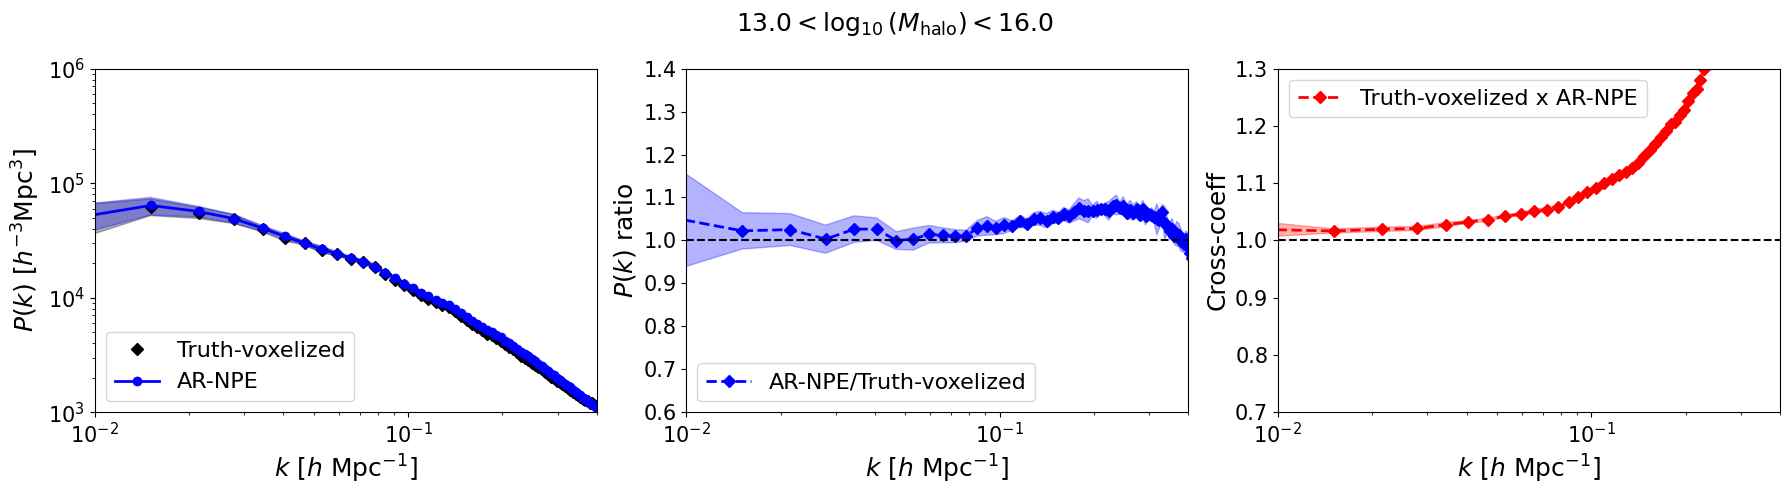

In [11]:
import matplotlib.pyplot as plt
jMb = 0
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharex=True)
fig.subplots_adjust(wspace=0.1, hspace=0.1)
axes[0].plot(k_Pk, np.mean(Pk_truth_all_allsims, axis=0)[jMb,:], label='Truth-voxelized', color='k', ls='', marker='D', lw=2.0)
axes[0].fill_between(k_Pk, np.mean(Pk_truth_all_allsims, axis=0)[jMb,:] - np.std(Pk_truth_all_allsims, axis=0)[jMb,:], np.mean(Pk_truth_all_allsims, axis=0)[jMb,:] + np.std(Pk_truth_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')
# axes[0,0].loglog(Pk_mock.k3D, Pk_mock.Pk[:,0], label='AR-NPE', color='k', ls='-', marker='o', lw=2.0)
axes[0].plot(k_Pk, np.mean(Pk_mock_all_allsims, axis=0)[0,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0].fill_between(k_Pk, np.mean(Pk_mock_all_allsims, axis=0)[jMb,:] - np.std(Pk_mock_all_allsims, axis=0)[jMb,:], np.mean(Pk_mock_all_allsims, axis=0)[jMb,:] + np.std(Pk_mock_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')
# axes[0].set_ylim(1e3, 1e5)
axes[0].set_ylim(1e3, 1e6)
axes[0].set_yscale('log')
axes[0].legend(fontsize=16, loc='lower left')
axes[0].set_ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]", size=18)
axes[0].tick_params(axis='both', labelsize=15)

axes[1].plot(k_Pk, np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth-voxelized', color='b', ls='--', marker='D', lw=2.0)
axes[1].fill_between(k_Pk, np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:] - np.std(Pk_ratio_all_allsims, axis=0)[jMb,:], np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:] + np.std(Pk_ratio_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')
axes[1].legend(fontsize=16, loc='lower left')
axes[1].set_ylabel(r"$P(k)$ ratio", size=18)
axes[1].axhline(1.0, ls='--', color='k')
axes[1].set_ylim(0.6, 1.4)
axes[1].tick_params(axis='both', labelsize=15)

axes[2].plot(k_Pk, np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:], label='Truth-voxelized x AR-NPE', color='r', ls='--', marker='D', lw=2.0)
axes[2].fill_between(k_Pk, np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:] - np.std(cross_corr_coeff_allsims, axis=0)[jMb,:], np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:] + np.std(cross_corr_coeff_allsims, axis=0)[jMb,:], alpha=0.3, color='r')
axes[2].set_ylim(0.7, 1.3)
axes[2].axhline(1.0, ls='--', color='k')
axes[2].set_xscale('log')
axes[2].legend(fontsize=16)
axes[0].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
axes[1].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
axes[2].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
axes[2].set_ylabel(r"Cross-coeff", size=18)
axes[2].tick_params(axis='both', labelsize=15)
axes[2].set_xlim(0.01, 0.4)
# plt.suptitle(str(Mmin_Pk) + r'$< \log(M) <$' + str(Mmax_Pk), size=20)
pl.suptitle(r'$13.0 < \log_{10}(M_{\rm halo}) < 16.0$', size=18)
plt.tight_layout()


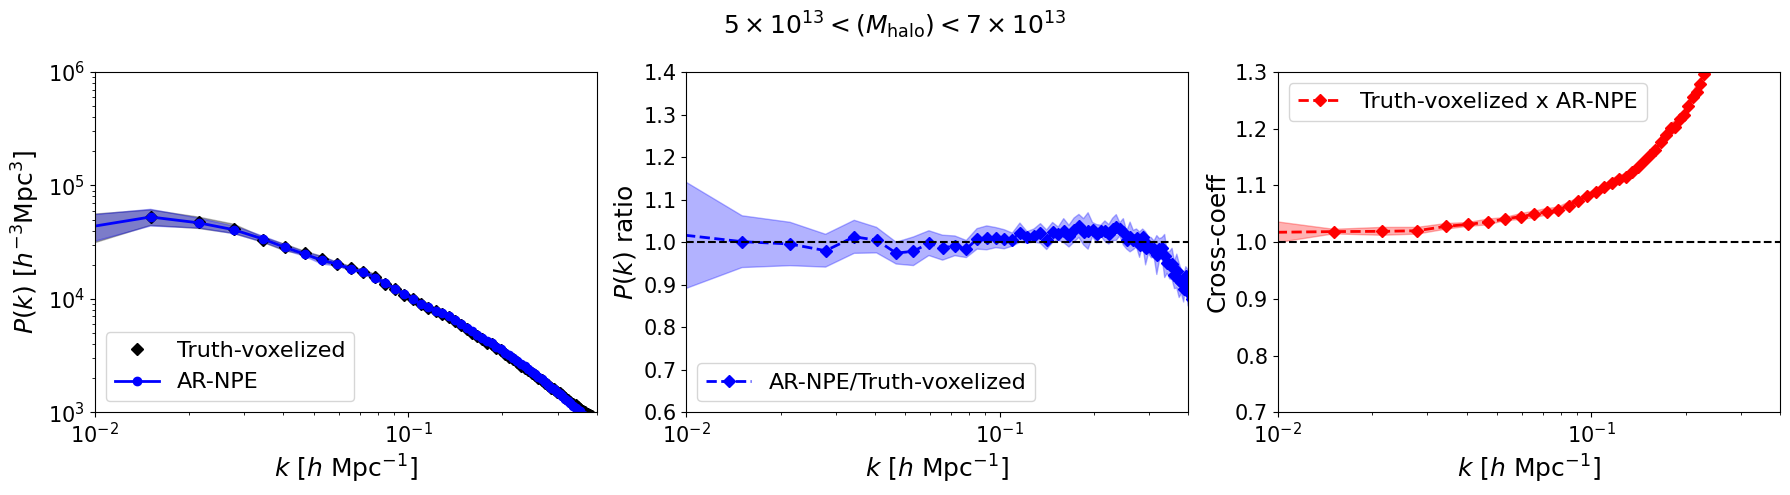

In [12]:
import matplotlib.pyplot as plt
jMb = 1
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharex=True)
fig.subplots_adjust(wspace=0.1, hspace=0.1)
axes[0].plot(k_Pk, np.mean(Pk_truth_all_allsims, axis=0)[jMb,:], label='Truth-voxelized', color='k', ls='', marker='D', lw=2.0)
axes[0].fill_between(k_Pk, np.mean(Pk_truth_all_allsims, axis=0)[jMb,:] - np.std(Pk_truth_all_allsims, axis=0)[jMb,:], np.mean(Pk_truth_all_allsims, axis=0)[jMb,:] + np.std(Pk_truth_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')
# axes[0,0].loglog(Pk_mock.k3D, Pk_mock.Pk[:,0], label='AR-NPE', color='k', ls='-', marker='o', lw=2.0)
axes[0].plot(k_Pk, np.mean(Pk_mock_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0].fill_between(k_Pk, np.mean(Pk_mock_all_allsims, axis=0)[jMb,:] - np.std(Pk_mock_all_allsims, axis=0)[jMb,:], np.mean(Pk_mock_all_allsims, axis=0)[jMb,:] + np.std(Pk_mock_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')
# axes[0].set_ylim(1e3, 1e5)
axes[0].set_ylim(1e3, 1e6)
axes[0].set_yscale('log')
axes[0].legend(fontsize=16, loc='lower left')
axes[0].set_ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]", size=18)
axes[0].tick_params(axis='both', labelsize=15)

axes[1].plot(k_Pk, np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth-voxelized', color='b', ls='--', marker='D', lw=2.0)
axes[1].fill_between(k_Pk, np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:] - np.std(Pk_ratio_all_allsims, axis=0)[jMb,:], np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:] + np.std(Pk_ratio_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')
axes[1].legend(fontsize=16, loc='lower left')
axes[1].set_ylabel(r"$P(k)$ ratio", size=18)
axes[1].axhline(1.0, ls='--', color='k')
axes[1].set_ylim(0.6, 1.4)
axes[1].tick_params(axis='both', labelsize=15)

axes[2].plot(k_Pk, np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:], label='Truth-voxelized x AR-NPE', color='r', ls='--', marker='D', lw=2.0)
axes[2].fill_between(k_Pk, np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:] - np.std(cross_corr_coeff_allsims, axis=0)[jMb,:], np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:] + np.std(cross_corr_coeff_allsims, axis=0)[jMb,:], alpha=0.3, color='r')
axes[2].set_ylim(0.7, 1.3)
axes[2].axhline(1.0, ls='--', color='k')
axes[2].set_xscale('log')
axes[2].legend(fontsize=16)
axes[0].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
axes[1].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
axes[2].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
axes[2].set_ylabel(r"Cross-coeff", size=18)
axes[2].tick_params(axis='both', labelsize=15)
axes[2].set_xlim(0.01, 0.4)
# plt.suptitle(str(Mmin_Pk) + r'$< \log(M) <$' + str(Mmax_Pk), size=20)
# pl.suptitle(r'$13.5 < \log_{10}(M_{\rm halo}) < 14.0$', size=18)
# pl.suptitle(r'$7\times 10^{13} < (M_{\rm halo}) < 10^{14}$', size=18)
pl.suptitle(r'$5\times 10^{13} < (M_{\rm halo}) < 7\times 10^{13}$', size=18)
plt.tight_layout()


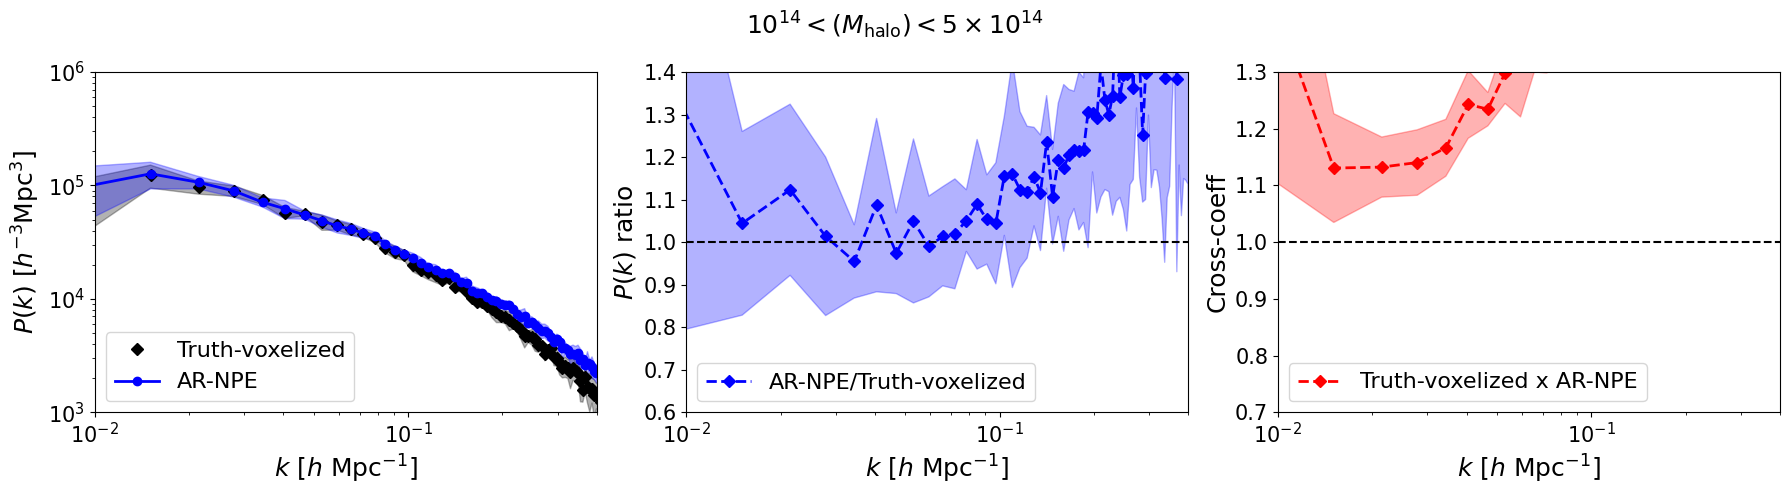

In [13]:
import matplotlib.pyplot as plt
jMb = 3
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharex=True)
fig.subplots_adjust(wspace=0.1, hspace=0.1)
axes[0].plot(k_Pk, np.mean(Pk_truth_all_allsims, axis=0)[jMb,:], label='Truth-voxelized', color='k', ls='', marker='D', lw=2.0)
axes[0].fill_between(k_Pk, np.mean(Pk_truth_all_allsims, axis=0)[jMb,:] - np.std(Pk_truth_all_allsims, axis=0)[jMb,:], np.mean(Pk_truth_all_allsims, axis=0)[jMb,:] + np.std(Pk_truth_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')
# axes[0,0].loglog(Pk_mock.k3D, Pk_mock.Pk[:,0], label='AR-NPE', color='k', ls='-', marker='o', lw=2.0)
axes[0].plot(k_Pk, np.mean(Pk_mock_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0].fill_between(k_Pk, np.mean(Pk_mock_all_allsims, axis=0)[jMb,:] - np.std(Pk_mock_all_allsims, axis=0)[jMb,:], np.mean(Pk_mock_all_allsims, axis=0)[jMb,:] + np.std(Pk_mock_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')
# axes[0].set_ylim(1e3, 1e5)
axes[0].set_ylim(1e3, 1e6)
axes[0].set_yscale('log')
axes[0].legend(fontsize=16, loc='lower left')
axes[0].set_ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]", size=18)
axes[0].tick_params(axis='both', labelsize=15)

axes[1].plot(k_Pk, np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth-voxelized', color='b', ls='--', marker='D', lw=2.0)
axes[1].fill_between(k_Pk, np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:] - np.std(Pk_ratio_all_allsims, axis=0)[jMb,:], np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:] + np.std(Pk_ratio_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')
axes[1].legend(fontsize=16, loc='lower left')
axes[1].set_ylabel(r"$P(k)$ ratio", size=18)
axes[1].axhline(1.0, ls='--', color='k')
axes[1].set_ylim(0.6, 1.4)
axes[1].tick_params(axis='both', labelsize=15)

axes[2].plot(k_Pk, np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:], label='Truth-voxelized x AR-NPE', color='r', ls='--', marker='D', lw=2.0)
axes[2].fill_between(k_Pk, np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:] - np.std(cross_corr_coeff_allsims, axis=0)[jMb,:], np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:] + np.std(cross_corr_coeff_allsims, axis=0)[jMb,:], alpha=0.3, color='r')
axes[2].set_ylim(0.7, 1.3)
axes[2].axhline(1.0, ls='--', color='k')
axes[2].set_xscale('log')
axes[2].legend(fontsize=16)
axes[0].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
axes[1].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
axes[2].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
axes[2].set_ylabel(r"Cross-coeff", size=18)
axes[2].tick_params(axis='both', labelsize=15)
axes[2].set_xlim(0.01, 0.4)
# plt.suptitle(str(Mmin_Pk) + r'$< \log(M) <$' + str(Mmax_Pk), size=20)
# pl.suptitle(r'$14.0 < \log_{10}(M_{\rm halo}) < 14.5$', size=18)
pl.suptitle(r'$10^{14} < (M_{\rm halo}) < 5\times 10^{14}$', size=18)
plt.tight_layout()






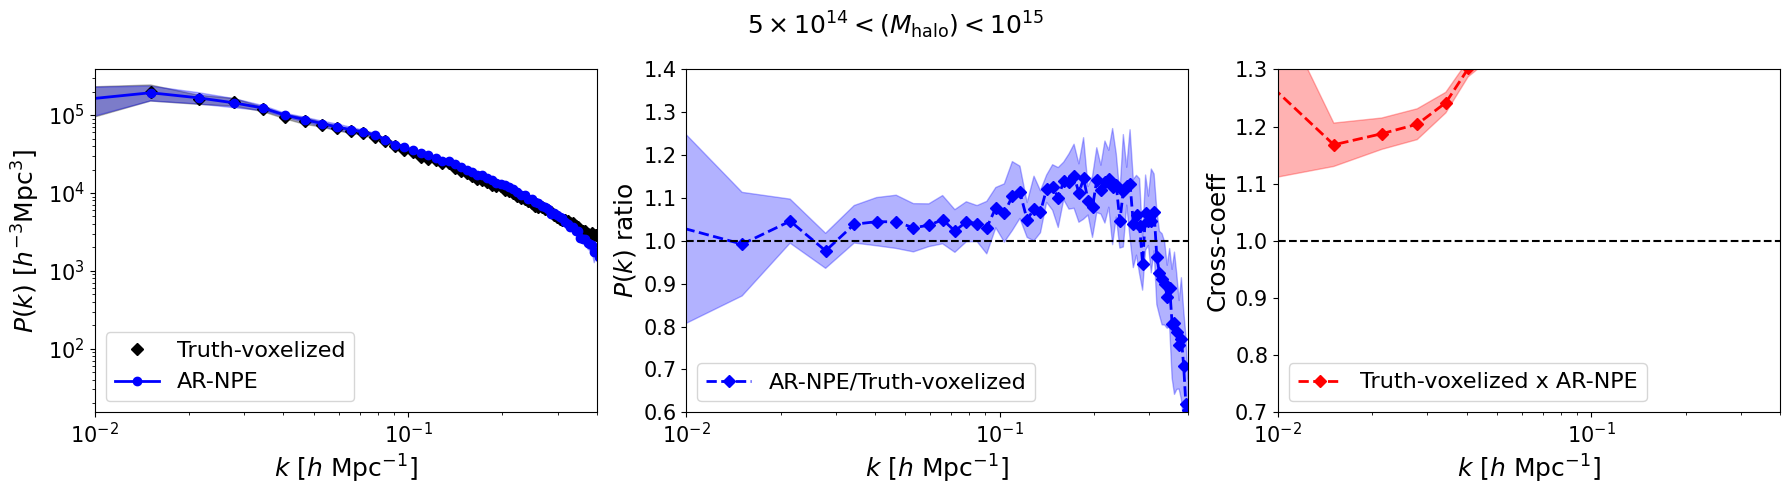

In [14]:
import matplotlib.pyplot as plt
jMb = 4
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharex=True)
fig.subplots_adjust(wspace=0.1, hspace=0.1)
axes[0].plot(k_Pk, np.mean(Pk_truth_all_allsims, axis=0)[jMb,:], label='Truth-voxelized', color='k', ls='', marker='D', lw=2.0)
axes[0].fill_between(k_Pk, np.mean(Pk_truth_all_allsims, axis=0)[jMb,:] - np.std(Pk_truth_all_allsims, axis=0)[jMb,:], np.mean(Pk_truth_all_allsims, axis=0)[jMb,:] + np.std(Pk_truth_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')
# axes[0,0].loglog(Pk_mock.k3D, Pk_mock.Pk[:,0], label='AR-NPE', color='k', ls='-', marker='o', lw=2.0)
axes[0].plot(k_Pk, np.mean(Pk_mock_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0].fill_between(k_Pk, np.mean(Pk_mock_all_allsims, axis=0)[jMb,:] - np.std(Pk_mock_all_allsims, axis=0)[jMb,:], np.mean(Pk_mock_all_allsims, axis=0)[jMb,:] + np.std(Pk_mock_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')
# axes[0].set_ylim(1e3, 1e5)
# axes[0].set_ylim(1e3, 1e6)
axes[0].set_yscale('log')

axes[0].legend(fontsize=16, loc='lower left')
axes[0].set_ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]", size=18)
axes[0].tick_params(axis='both', labelsize=15)

axes[1].plot(k_Pk, np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth-voxelized', color='b', ls='--', marker='D', lw=2.0)
axes[1].fill_between(k_Pk, np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:] - np.std(Pk_ratio_all_allsims, axis=0)[jMb,:], np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:] + np.std(Pk_ratio_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')
axes[1].legend(fontsize=16, loc='lower left')
axes[1].set_ylabel(r"$P(k)$ ratio", size=18)
axes[1].axhline(1.0, ls='--', color='k')
axes[1].set_ylim(0.6, 1.4)
axes[1].tick_params(axis='both', labelsize=15)

axes[2].plot(k_Pk, np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:], label='Truth-voxelized x AR-NPE', color='r', ls='--', marker='D', lw=2.0)
axes[2].fill_between(k_Pk, np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:] - np.std(cross_corr_coeff_allsims, axis=0)[jMb,:], np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:] + np.std(cross_corr_coeff_allsims, axis=0)[jMb,:], alpha=0.3, color='r')
axes[2].set_ylim(0.7, 1.3)
axes[2].axhline(1.0, ls='--', color='k')
axes[2].set_xscale('log')
axes[2].legend(fontsize=16)
axes[0].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
axes[1].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
axes[2].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
axes[2].set_ylabel(r"Cross-coeff", size=18)
axes[2].tick_params(axis='both', labelsize=15)
axes[2].set_xlim(0.01, 0.4)
# plt.suptitle(str(Mmin_Pk) + r'$< \log(M) <$' + str(Mmax_Pk), size=20)
# pl.suptitle(r'$14.5 < \log_{10}(M_{\rm halo}) < 15.0$', size=18)
pl.suptitle(r'$5\times 10^{14} < (M_{\rm halo}) < 10^{15}$', size=18)
plt.tight_layout()



In [15]:
# Mmin_Pk_all = np.array([13.0, 13.0, 13.5, 14.0, 14.5])
# Mmax_Pk_all = np.array([16.0, 13.5, 14.0, 14.5, 15.0])
# # jMb = 0
# ldir = '/mnt/home/spandey/ceph/AR_NPE/notebooks/SUMMARY_STATS_FIDSIMS/'
# isim_start = 1
# isim_end = 20
# isim_all = np.arange(isim_start, isim_end).astype(int)

Bk_truth_k0p03_all_allsims = []
Bk_mock_k0p03_all_allsims = []
Qk_truth_k0p03_all_allsims = []
Qk_mock_k0p03_all_allsims = []

Bk_truth_k0p06_all_allsims = []
Bk_mock_k0p06_all_allsims = []
Qk_truth_k0p06_all_allsims = []
Qk_mock_k0p06_all_allsims = []

Bk_truth_k0p1_all_allsims = []
Bk_mock_k0p1_all_allsims = []
Qk_truth_k0p1_all_allsims = []
Qk_mock_k0p1_all_allsims = []

Bk_truth_k0p2_all_allsims = []
Bk_mock_k0p2_all_allsims = []
Qk_truth_k0p2_all_allsims = []
Qk_mock_k0p2_all_allsims = []

Bk_truth_k0p3_all_allsims = []
Bk_mock_k0p3_all_allsims = []
Qk_truth_k0p3_all_allsims = []
Qk_mock_k0p3_all_allsims = []

for ji in tqdm(range(len(isim_all))):
    isim = isim_all[ji]
    saved = pk.load(open(ldir + '/summary_stats_jsim_' + str(isim) + '.pk', 'rb'))

    Bk_truth_k0p03_all_ji = []
    Bk_mock_k0p03_all_ji = []
    Qk_truth_k0p03_all_ji = []
    Qk_mock_k0p03_all_ji = []

    Bk_truth_k0p06_all_ji = []
    Bk_mock_k0p06_all_ji = []
    Qk_truth_k0p06_all_ji = []
    Qk_mock_k0p06_all_ji = []

    Bk_truth_k0p1_all_ji = []
    Bk_mock_k0p1_all_ji = []
    Qk_truth_k0p1_all_ji = []
    Qk_mock_k0p1_all_ji = []

    Bk_truth_k0p2_all_ji = []
    Bk_mock_k0p2_all_ji = []
    Qk_truth_k0p2_all_ji = []
    Qk_mock_k0p2_all_ji = []

    Bk_truth_k0p3_all_ji = []
    Bk_mock_k0p3_all_ji = []
    Qk_truth_k0p3_all_ji = []
    Qk_mock_k0p3_all_ji = []

    for jMb in range(Mmin_Pk_all.size):
        Bk_truth_k0p03_all_ji.append(saved['Pk_Bk'][jMb]['Bk_truth_k0p03'])
        Bk_mock_k0p03_all_ji.append(saved['Pk_Bk'][jMb]['Bk_mock_k0p03'])
        Qk_truth_k0p03_all_ji.append(saved['Pk_Bk'][jMb]['Qk_truth_k0p03'])
        Qk_mock_k0p03_all_ji.append(saved['Pk_Bk'][jMb]['Qk_mock_k0p03'])

        Bk_truth_k0p06_all_ji.append(saved['Pk_Bk'][jMb]['Bk_truth_k0p06'])
        Bk_mock_k0p06_all_ji.append(saved['Pk_Bk'][jMb]['Bk_mock_k0p06'])
        Qk_truth_k0p06_all_ji.append(saved['Pk_Bk'][jMb]['Qk_truth_k0p06'])
        Qk_mock_k0p06_all_ji.append(saved['Pk_Bk'][jMb]['Qk_mock_k0p06'])

        Bk_truth_k0p1_all_ji.append(saved['Pk_Bk'][jMb]['Bk_truth_k0p1'])
        Bk_mock_k0p1_all_ji.append(saved['Pk_Bk'][jMb]['Bk_mock_k0p1'])
        Qk_truth_k0p1_all_ji.append(saved['Pk_Bk'][jMb]['Qk_truth_k0p1'])
        Qk_mock_k0p1_all_ji.append(saved['Pk_Bk'][jMb]['Qk_mock_k0p1'])

        Bk_truth_k0p2_all_ji.append(saved['Pk_Bk'][jMb]['Bk_truth_k0p2'])
        Bk_mock_k0p2_all_ji.append(saved['Pk_Bk'][jMb]['Bk_mock_k0p2'])
        Qk_truth_k0p2_all_ji.append(saved['Pk_Bk'][jMb]['Qk_truth_k0p2'])
        Qk_mock_k0p2_all_ji.append(saved['Pk_Bk'][jMb]['Qk_mock_k0p2'])

        Bk_truth_k0p3_all_ji.append(saved['Pk_Bk'][jMb]['Bk_truth_k0p3'])
        Bk_mock_k0p3_all_ji.append(saved['Pk_Bk'][jMb]['Bk_mock_k0p3'])
        Qk_truth_k0p3_all_ji.append(saved['Pk_Bk'][jMb]['Qk_truth_k0p3'])
        Qk_mock_k0p3_all_ji.append(saved['Pk_Bk'][jMb]['Qk_mock_k0p3'])

    Bk_truth_k0p03_all_allsims.append(Bk_truth_k0p03_all_ji)
    Bk_mock_k0p03_all_allsims.append(Bk_mock_k0p03_all_ji)
    Qk_truth_k0p03_all_allsims.append(Qk_truth_k0p03_all_ji)
    Qk_mock_k0p03_all_allsims.append(Qk_mock_k0p03_all_ji)

    Bk_truth_k0p06_all_allsims.append(Bk_truth_k0p06_all_ji)
    Bk_mock_k0p06_all_allsims.append(Bk_mock_k0p06_all_ji)
    Qk_truth_k0p06_all_allsims.append(Qk_truth_k0p06_all_ji)
    Qk_mock_k0p06_all_allsims.append(Qk_mock_k0p06_all_ji)

    Bk_truth_k0p1_all_allsims.append(Bk_truth_k0p1_all_ji)
    Bk_mock_k0p1_all_allsims.append(Bk_mock_k0p1_all_ji)
    Qk_truth_k0p1_all_allsims.append(Qk_truth_k0p1_all_ji)
    Qk_mock_k0p1_all_allsims.append(Qk_mock_k0p1_all_ji)

    Bk_truth_k0p2_all_allsims.append(Bk_truth_k0p2_all_ji)
    Bk_mock_k0p2_all_allsims.append(Bk_mock_k0p2_all_ji)
    Qk_truth_k0p2_all_allsims.append(Qk_truth_k0p2_all_ji)
    Qk_mock_k0p2_all_allsims.append(Qk_mock_k0p2_all_ji)

    Bk_truth_k0p3_all_allsims.append(Bk_truth_k0p3_all_ji)
    Bk_mock_k0p3_all_allsims.append(Bk_mock_k0p3_all_ji)
    Qk_truth_k0p3_all_allsims.append(Qk_truth_k0p3_all_ji)
    Qk_mock_k0p3_all_allsims.append(Qk_mock_k0p3_all_ji)

theta = saved['Pk_Bk'][0]['theta']

Bk_truth_k0p03_all_allsims = np.array(Bk_truth_k0p03_all_allsims)
Bk_mock_k0p03_all_allsims = np.array(Bk_mock_k0p03_all_allsims)
Qk_truth_k0p03_all_allsims = np.array(Qk_truth_k0p03_all_allsims)
Qk_mock_k0p03_all_allsims = np.array(Qk_mock_k0p03_all_allsims)

Bk_truth_k0p06_all_allsims = np.array(Bk_truth_k0p06_all_allsims)
Bk_mock_k0p06_all_allsims = np.array(Bk_mock_k0p06_all_allsims)
Qk_truth_k0p06_all_allsims = np.array(Qk_truth_k0p06_all_allsims)
Qk_mock_k0p06_all_allsims = np.array(Qk_mock_k0p06_all_allsims)

Bk_truth_k0p1_all_allsims = np.array(Bk_truth_k0p1_all_allsims)
Bk_mock_k0p1_all_allsims = np.array(Bk_mock_k0p1_all_allsims)
Qk_truth_k0p1_all_allsims = np.array(Qk_truth_k0p1_all_allsims)
Qk_mock_k0p1_all_allsims = np.array(Qk_mock_k0p1_all_allsims)

Bk_truth_k0p2_all_allsims = np.array(Bk_truth_k0p2_all_allsims)
Bk_mock_k0p2_all_allsims = np.array(Bk_mock_k0p2_all_allsims)
Qk_truth_k0p2_all_allsims = np.array(Qk_truth_k0p2_all_allsims)
Qk_mock_k0p2_all_allsims = np.array(Qk_mock_k0p2_all_allsims)

Bk_truth_k0p3_all_allsims = np.array(Bk_truth_k0p3_all_allsims)
Bk_mock_k0p3_all_allsims = np.array(Bk_mock_k0p3_all_allsims)
Qk_truth_k0p3_all_allsims = np.array(Qk_truth_k0p3_all_allsims)
Qk_mock_k0p3_all_allsims = np.array(Qk_mock_k0p3_all_allsims)

Bk_ratio_k0p03_all_allsims = Bk_mock_k0p03_all_allsims/Bk_truth_k0p03_all_allsims
Qk_ratio_k0p03_all_allsims = Qk_mock_k0p03_all_allsims/Qk_truth_k0p03_all_allsims

Bk_ratio_k0p06_all_allsims = Bk_mock_k0p06_all_allsims/Bk_truth_k0p06_all_allsims
Qk_ratio_k0p06_all_allsims = Qk_mock_k0p06_all_allsims/Qk_truth_k0p06_all_allsims

Bk_ratio_k0p1_all_allsims = Bk_mock_k0p1_all_allsims/Bk_truth_k0p1_all_allsims
Qk_ratio_k0p1_all_allsims = Qk_mock_k0p1_all_allsims/Qk_truth_k0p1_all_allsims

Bk_ratio_k0p2_all_allsims = Bk_mock_k0p2_all_allsims/Bk_truth_k0p2_all_allsims
Qk_ratio_k0p2_all_allsims = Qk_mock_k0p2_all_allsims/Qk_truth_k0p2_all_allsims

Bk_ratio_k0p3_all_allsims = Bk_mock_k0p3_all_allsims/Bk_truth_k0p3_all_allsims
Qk_ratio_k0p3_all_allsims = Qk_mock_k0p3_all_allsims/Qk_truth_k0p3_all_allsims



100%|██████████| 10/10 [00:00<00:00, 1237.92it/s]


In [16]:
# k_Bk = np.array([0.03, 0.06, 0.1, 0.2, 0.3])
# theta_eq = np.where(theta > np.pi/3)[0][0]
# Bk_ratio_k0p3_all_allsims.shape
Bk_truth_k0p03_all_allsims.shape


(10, 5, 16)

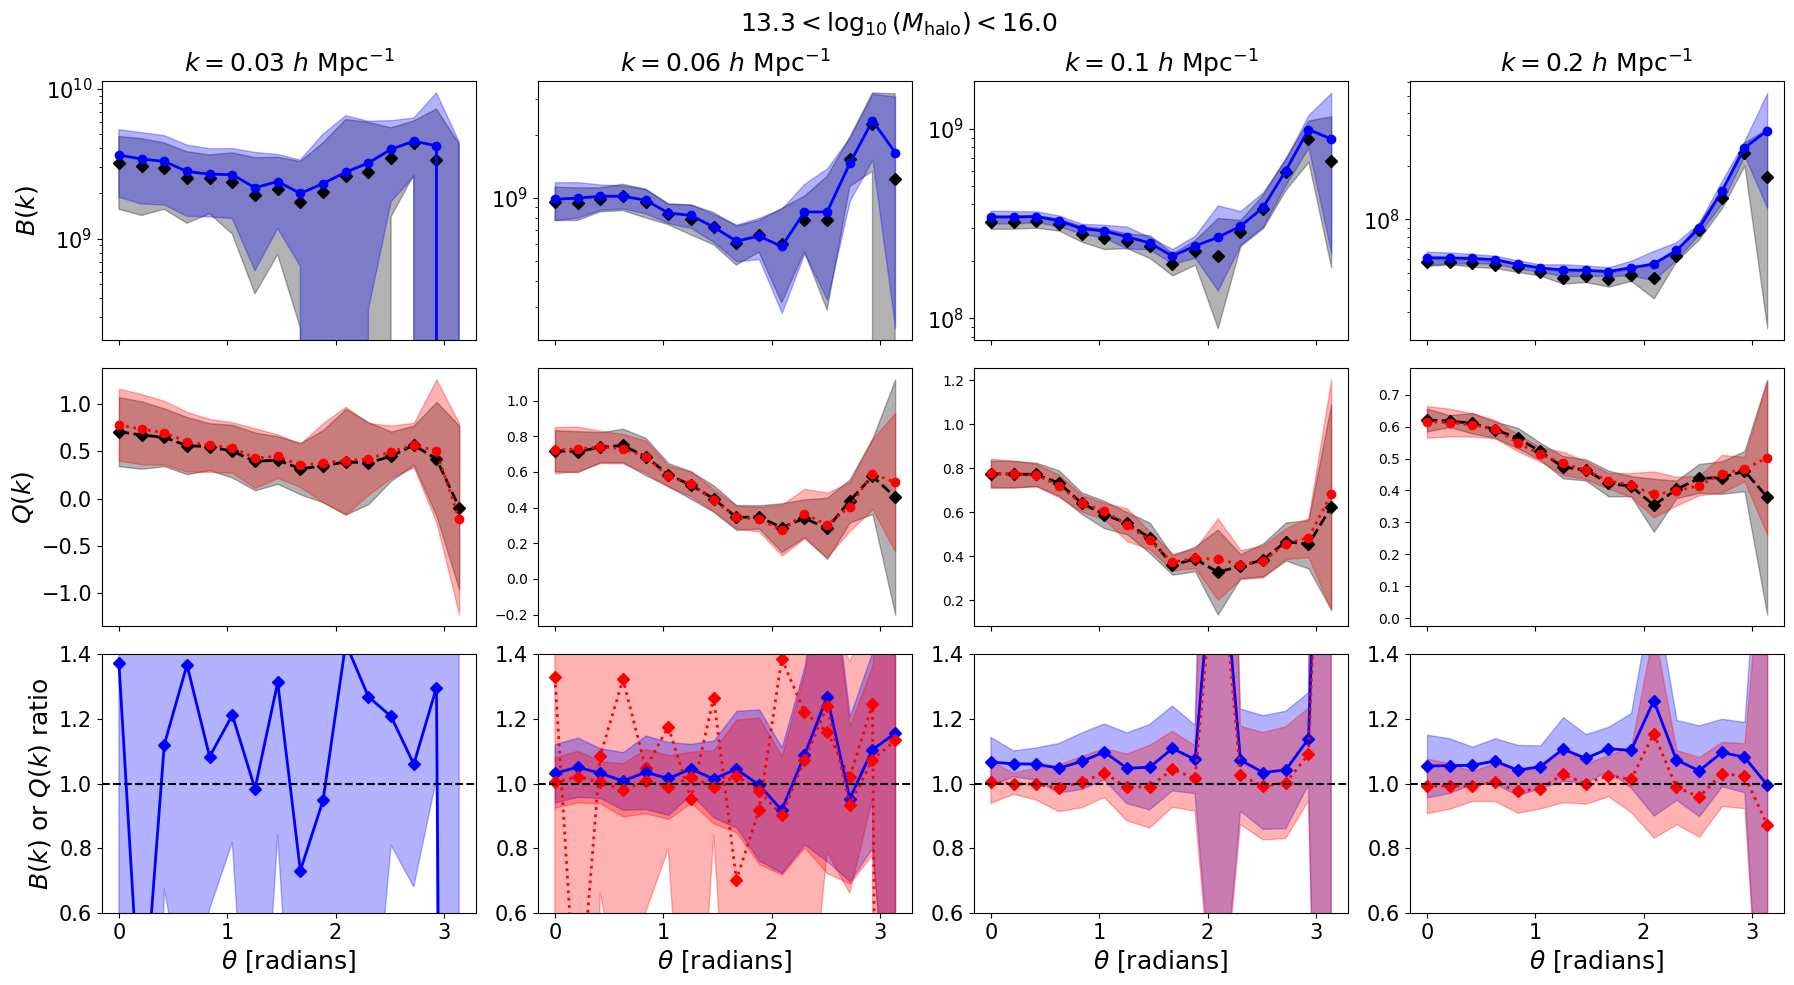

In [17]:
import matplotlib.pyplot as plt
jMb = 0
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 10), sharex=True)
fig.subplots_adjust(wspace=0.1, hspace=0.1)
axes[0,0].plot(theta, np.mean(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='', marker='D', lw=2.0)
axes[0,0].fill_between(theta, np.mean(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[0,0].plot(theta, np.mean(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0,0].fill_between(theta, np.mean(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[1,0].plot(theta, np.mean(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='--', marker='D', lw=2.0)
axes[1,0].fill_between(theta, np.mean(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[1,0].plot(theta, np.mean(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='r', ls=':', marker='o', lw=2.0)
axes[1,0].fill_between(theta, np.mean(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

axes[0,0].set_title(r'$k=0.03 \ h \ \mathrm{Mpc}^{-1}$', size=18)
# axes[0].set_ylim(1e3, 1e6)
axes[0,0].set_yscale('log')
# axes[0,0].legend(fontsize=16, loc='lower left')
axes[0,0].set_ylabel(r"$B(k)$", size=18)
axes[1,0].set_ylabel(r"$Q(k)$", size=18)
axes[0,0].tick_params(axis='both', labelsize=15)
axes[1,0].tick_params(axis='both', labelsize=15)

axes[2,0].plot(theta, np.mean(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='b', ls='-', marker='D', lw=2.0)
axes[2,0].fill_between(theta, np.mean(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[2,1].plot(theta, np.mean(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='r', ls=':', marker='D', lw=2.0)
axes[2,1].fill_between(theta, np.mean(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

# axes[1,0].legend(fontsize=16, loc='lower left')
axes[2,0].set_ylabel(r"$B(k)$ or $Q(k)$ ratio", size=18)
axes[2,0].axhline(1.0, ls='--', color='k')
axes[2,0].set_ylim(0.6, 1.4)
axes[2,0].tick_params(axis='both', labelsize=15)
axes[2,0].set_xlabel(r"$\theta$ [radians]", size=18)

axes[0,1].plot(theta, np.mean(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='', marker='D', lw=2.0)
axes[0,1].fill_between(theta, np.mean(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[0,1].plot(theta, np.mean(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0,1].fill_between(theta, np.mean(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[1,1].plot(theta, np.mean(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='--', marker='D', lw=2.0)
axes[1,1].fill_between(theta, np.mean(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[1,1].plot(theta, np.mean(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='r', ls=':', marker='o', lw=2.0)
axes[1,1].fill_between(theta, np.mean(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

axes[0,1].set_yscale('log')
# axes[0,1].legend(fontsize=16, loc='lower left')
axes[0,1].tick_params(axis='both', labelsize=15)
axes[0,1].set_title(r'$k=0.06 \ h \ \mathrm{Mpc}^{-1}$', size=18)
axes[2,1].plot(theta, np.mean(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='b', ls='-', marker='D', lw=2.0)
axes[2,1].fill_between(theta, np.mean(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[2,1].plot(theta, np.mean(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='r', ls=':', marker='D', lw=2.0)
axes[2,1].fill_between(theta, np.mean(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

# axes[1,1].legend(fontsize=16, loc='lower left')
axes[2,1].axhline(1.0, ls='--', color='k')
axes[2,1].set_ylim(0.6, 1.4)
axes[2,1].tick_params(axis='both', labelsize=15)
axes[2,1].set_xlabel(r"$\theta$ [radians]", size=18)

axes[0,2].plot(theta, np.mean(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='', marker='D', lw=2.0)
axes[0,2].fill_between(theta, np.mean(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[0,2].plot(theta, np.mean(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0,2].fill_between(theta, np.mean(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[1,2].plot(theta, np.mean(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='--', marker='D', lw=2.0)
axes[1,2].fill_between(theta, np.mean(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[1,2].plot(theta, np.mean(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='r', ls=':', marker='o', lw=2.0)
axes[1,2].fill_between(theta, np.mean(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

axes[0,2].set_yscale('log')
# axes[0,2].legend(fontsize=16, loc='lower left')

axes[0,2].tick_params(axis='both', labelsize=15)
axes[0,2].set_title(r'$k=0.1 \ h \ \mathrm{Mpc}^{-1}$', size=18)
axes[2,2].plot(theta, np.mean(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='b', ls='-', marker='D', lw=2.0)
axes[2,2].fill_between(theta, np.mean(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[2,2].plot(theta, np.mean(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='r', ls=':', marker='D', lw=2.0)
axes[2,2].fill_between(theta, np.mean(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

# axes[1,2].legend(fontsize=16, loc='lower left')
axes[2,2].axhline(1.0, ls='--', color='k')
axes[2,2].set_ylim(0.6, 1.4)
axes[2,2].tick_params(axis='both', labelsize=15)
axes[2,2].set_xlabel(r"$\theta$ [radians]", size=18)

axes[0,3].plot(theta, np.mean(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='', marker='D', lw=2.0)
axes[0,3].fill_between(theta, np.mean(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[0,3].plot(theta, np.mean(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0,3].fill_between(theta, np.mean(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[1,3].plot(theta, np.mean(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='--', marker='D', lw=2.0)
axes[1,3].fill_between(theta, np.mean(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[1,3].plot(theta, np.mean(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='r', ls=':', marker='o', lw=2.0)
axes[1,3].fill_between(theta, np.mean(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

axes[0,3].set_yscale('log')
# axes[0,3].legend(fontsize=16, loc='lower left')
axes[0,3].tick_params(axis='both', labelsize=15)
axes[0,3].set_title(r'$k=0.2 \ h \ \mathrm{Mpc}^{-1}$', size=18)
axes[2,3].plot(theta, np.mean(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='b', ls='-', marker='D', lw=2.0)
axes[2,3].fill_between(theta, np.mean(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[2,3].plot(theta, np.mean(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='r', ls=':', marker='D', lw=2.0)
axes[2,3].fill_between(theta, np.mean(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

# axes[1,3].legend(fontsize=16, loc='lower left')
axes[2,3].axhline(1.0, ls='--', color='k')
axes[2,3].set_ylim(0.6, 1.4)
axes[2,3].tick_params(axis='both', labelsize=15)
axes[2,3].set_xlabel(r"$\theta$ [radians]", size=18)


# axes[1].plot(k_Pk, np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth-voxelized', color='b', ls='--', marker='D', lw=2.0)
# axes[1].fill_between(k_Pk, np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:] - np.std(Pk_ratio_all_allsims, axis=0)[jMb,:], np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:] + np.std(Pk_ratio_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')
# axes[1].legend(fontsize=16, loc='lower left')
# axes[1].set_ylabel(r"$P(k)$ ratio", size=18)
# axes[1].axhline(1.0, ls='--', color='k')
# axes[1].set_ylim(0.6, 1.4)
# axes[1].tick_params(axis='both', labelsize=15)

# axes[2].plot(k_Pk, np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:], label='Truth-voxelized x AR-NPE', color='r', ls='--', marker='D', lw=2.0)
# axes[2].fill_between(k_Pk, np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:] - np.std(cross_corr_coeff_allsims, axis=0)[jMb,:], np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:] + np.std(cross_corr_coeff_allsims, axis=0)[jMb,:], alpha=0.3, color='r')
# axes[2].set_ylim(0.7, 1.3)
# axes[2].axhline(1.0, ls='--', color='k')
# axes[2].set_xscale('log')
# axes[2].legend(fontsize=16)
# axes[0].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
# axes[1].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
# axes[2].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
# axes[2].set_ylabel(r"Cross-coeff", size=18)
# axes[2].tick_params(axis='both', labelsize=15)
# axes[2].set_xlim(0.01, 0.4)
# plt.suptitle(str(Mmin_Pk) + r'$< \log(M) <$' + str(Mmax_Pk), size=20)
pl.suptitle(r'$13.3 < \log_{10}(M_{\rm halo}) < 16.0$', size=18)
plt.tight_layout()




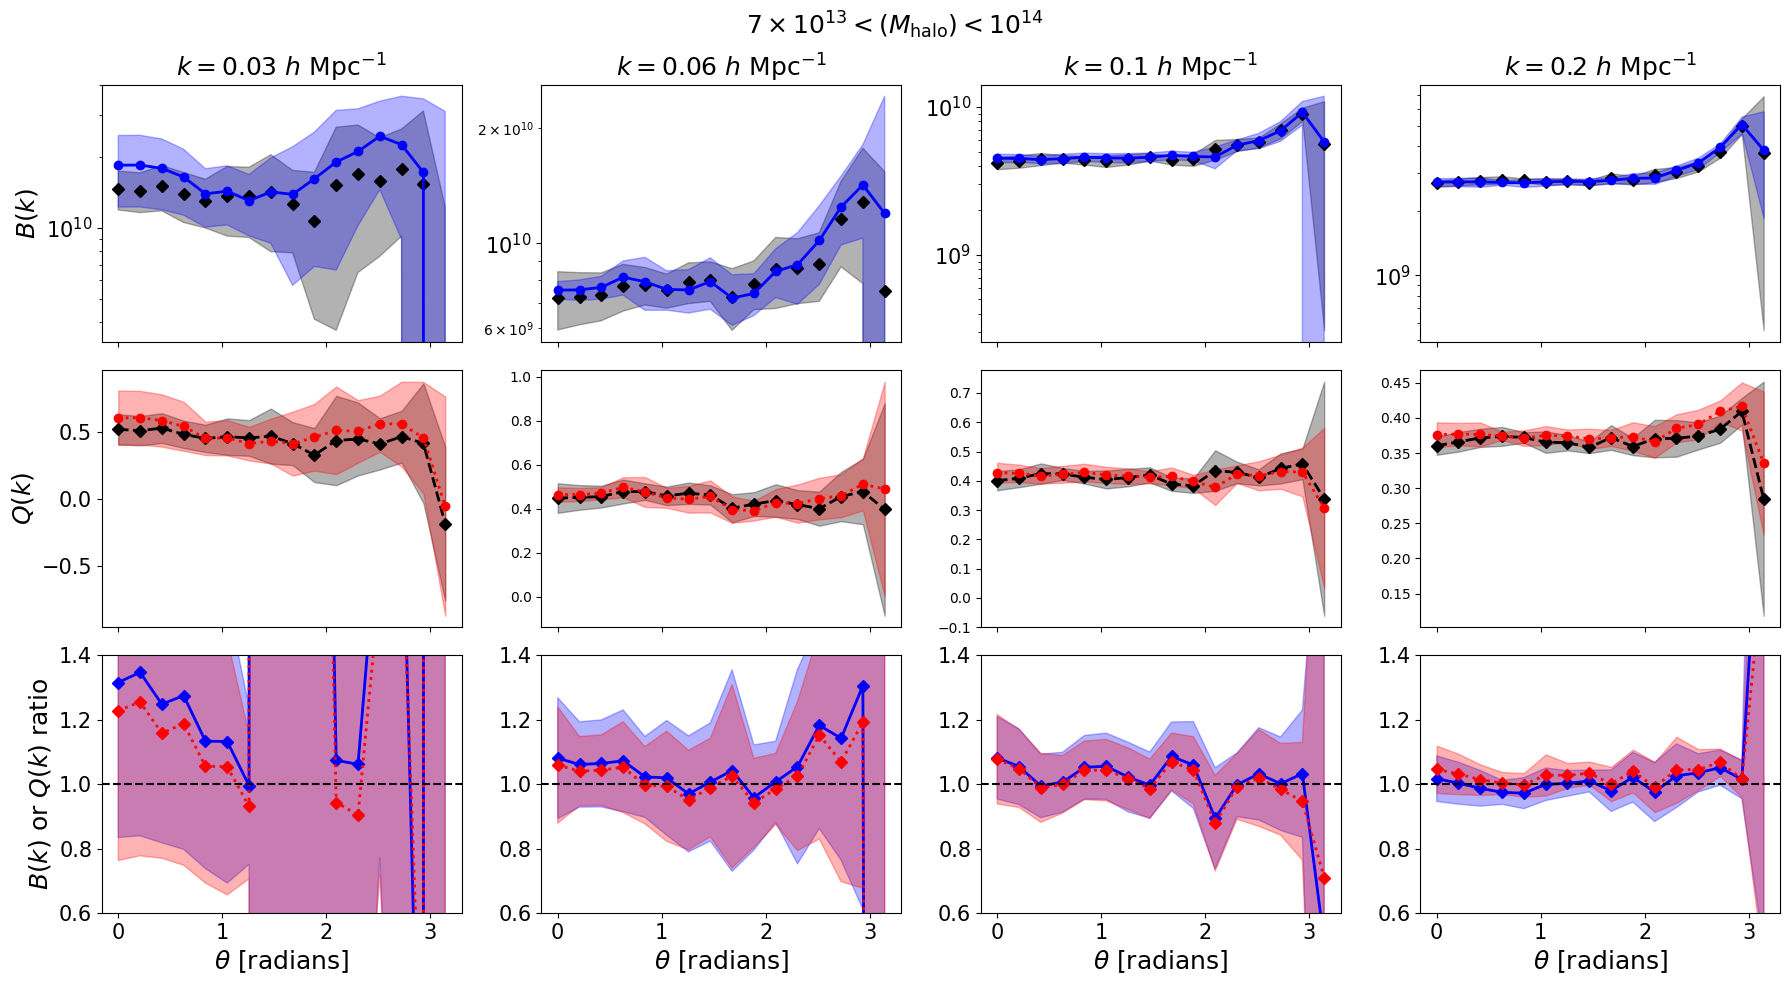

In [18]:
import matplotlib.pyplot as plt
jMb = 2
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 10), sharex=True)
fig.subplots_adjust(wspace=0.1, hspace=0.1)
axes[0,0].plot(theta, np.mean(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='', marker='D', lw=2.0)
axes[0,0].fill_between(theta, np.mean(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[0,0].plot(theta, np.mean(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0,0].fill_between(theta, np.mean(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[1,0].plot(theta, np.mean(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='--', marker='D', lw=2.0)
axes[1,0].fill_between(theta, np.mean(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[1,0].plot(theta, np.mean(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='r', ls=':', marker='o', lw=2.0)
axes[1,0].fill_between(theta, np.mean(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

axes[0,0].set_title(r'$k=0.03 \ h \ \mathrm{Mpc}^{-1}$', size=18)
# axes[0].set_ylim(1e3, 1e6)
axes[0,0].set_yscale('log')
# axes[0,0].legend(fontsize=16, loc='lower left')
axes[0,0].set_ylabel(r"$B(k)$", size=18)
axes[1,0].set_ylabel(r"$Q(k)$", size=18)
axes[0,0].tick_params(axis='both', labelsize=15)
axes[1,0].tick_params(axis='both', labelsize=15)

axes[2,0].plot(theta, np.mean(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='b', ls='-', marker='D', lw=2.0)
axes[2,0].fill_between(theta, np.mean(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[2,0].plot(theta, np.mean(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='r', ls=':', marker='D', lw=2.0)
axes[2,0].fill_between(theta, np.mean(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

# axes[1,0].legend(fontsize=16, loc='lower left')
axes[2,0].set_ylabel(r"$B(k)$ or $Q(k)$ ratio", size=18)
axes[2,0].axhline(1.0, ls='--', color='k')
axes[2,0].set_ylim(0.6, 1.4)
axes[2,0].tick_params(axis='both', labelsize=15)
axes[2,0].set_xlabel(r"$\theta$ [radians]", size=18)

axes[0,1].plot(theta, np.mean(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='', marker='D', lw=2.0)
axes[0,1].fill_between(theta, np.mean(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[0,1].plot(theta, np.mean(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0,1].fill_between(theta, np.mean(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[1,1].plot(theta, np.mean(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='--', marker='D', lw=2.0)
axes[1,1].fill_between(theta, np.mean(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[1,1].plot(theta, np.mean(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='r', ls=':', marker='o', lw=2.0)
axes[1,1].fill_between(theta, np.mean(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

axes[0,1].set_yscale('log')
# axes[0,1].legend(fontsize=16, loc='lower left')
axes[0,1].tick_params(axis='both', labelsize=15)
axes[0,1].set_title(r'$k=0.06 \ h \ \mathrm{Mpc}^{-1}$', size=18)
axes[2,1].plot(theta, np.mean(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='b', ls='-', marker='D', lw=2.0)
axes[2,1].fill_between(theta, np.mean(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[2,1].plot(theta, np.mean(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='r', ls=':', marker='D', lw=2.0)
axes[2,1].fill_between(theta, np.mean(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

# axes[1,1].legend(fontsize=16, loc='lower left')
axes[2,1].axhline(1.0, ls='--', color='k')
axes[2,1].set_ylim(0.6, 1.4)
axes[2,1].tick_params(axis='both', labelsize=15)
axes[2,1].set_xlabel(r"$\theta$ [radians]", size=18)

axes[0,2].plot(theta, np.mean(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='', marker='D', lw=2.0)
axes[0,2].fill_between(theta, np.mean(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[0,2].plot(theta, np.mean(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0,2].fill_between(theta, np.mean(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[1,2].plot(theta, np.mean(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='--', marker='D', lw=2.0)
axes[1,2].fill_between(theta, np.mean(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[1,2].plot(theta, np.mean(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='r', ls=':', marker='o', lw=2.0)
axes[1,2].fill_between(theta, np.mean(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

axes[0,2].set_yscale('log')
# axes[0,2].legend(fontsize=16, loc='lower left')

axes[0,2].tick_params(axis='both', labelsize=15)
axes[0,2].set_title(r'$k=0.1 \ h \ \mathrm{Mpc}^{-1}$', size=18)
axes[2,2].plot(theta, np.mean(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='b', ls='-', marker='D', lw=2.0)
axes[2,2].fill_between(theta, np.mean(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[2,2].plot(theta, np.mean(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='r', ls=':', marker='D', lw=2.0)
axes[2,2].fill_between(theta, np.mean(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

# axes[1,2].legend(fontsize=16, loc='lower left')
axes[2,2].axhline(1.0, ls='--', color='k')
axes[2,2].set_ylim(0.6, 1.4)
axes[2,2].tick_params(axis='both', labelsize=15)
axes[2,2].set_xlabel(r"$\theta$ [radians]", size=18)

axes[0,3].plot(theta, np.mean(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='', marker='D', lw=2.0)
axes[0,3].fill_between(theta, np.mean(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[0,3].plot(theta, np.mean(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0,3].fill_between(theta, np.mean(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[1,3].plot(theta, np.mean(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='--', marker='D', lw=2.0)
axes[1,3].fill_between(theta, np.mean(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[1,3].plot(theta, np.mean(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='r', ls=':', marker='o', lw=2.0)
axes[1,3].fill_between(theta, np.mean(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

axes[0,3].set_yscale('log')
# axes[0,3].legend(fontsize=16, loc='lower left')
axes[0,3].tick_params(axis='both', labelsize=15)
axes[0,3].set_title(r'$k=0.2 \ h \ \mathrm{Mpc}^{-1}$', size=18)
axes[2,3].plot(theta, np.mean(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='b', ls='-', marker='D', lw=2.0)
axes[2,3].fill_between(theta, np.mean(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[2,3].plot(theta, np.mean(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='r', ls=':', marker='D', lw=2.0)
axes[2,3].fill_between(theta, np.mean(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

# axes[1,3].legend(fontsize=16, loc='lower left')
axes[2,3].axhline(1.0, ls='--', color='k')
axes[2,3].set_ylim(0.6, 1.4)
axes[2,3].tick_params(axis='both', labelsize=15)
axes[2,3].set_xlabel(r"$\theta$ [radians]", size=18)


# axes[1].plot(k_Pk, np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth-voxelized', color='b', ls='--', marker='D', lw=2.0)
# axes[1].fill_between(k_Pk, np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:] - np.std(Pk_ratio_all_allsims, axis=0)[jMb,:], np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:] + np.std(Pk_ratio_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')
# axes[1].legend(fontsize=16, loc='lower left')
# axes[1].set_ylabel(r"$P(k)$ ratio", size=18)
# axes[1].axhline(1.0, ls='--', color='k')
# axes[1].set_ylim(0.6, 1.4)
# axes[1].tick_params(axis='both', labelsize=15)

# axes[2].plot(k_Pk, np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:], label='Truth-voxelized x AR-NPE', color='r', ls='--', marker='D', lw=2.0)
# axes[2].fill_between(k_Pk, np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:] - np.std(cross_corr_coeff_allsims, axis=0)[jMb,:], np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:] + np.std(cross_corr_coeff_allsims, axis=0)[jMb,:], alpha=0.3, color='r')
# axes[2].set_ylim(0.7, 1.3)
# axes[2].axhline(1.0, ls='--', color='k')
# axes[2].set_xscale('log')
# axes[2].legend(fontsize=16)
# axes[0].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
# axes[1].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
# axes[2].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
# axes[2].set_ylabel(r"Cross-coeff", size=18)
# axes[2].tick_params(axis='both', labelsize=15)
# axes[2].set_xlim(0.01, 0.4)
# plt.suptitle(str(Mmin_Pk) + r'$< \log(M) <$' + str(Mmax_Pk), size=20)
# pl.suptitle(r'$13.5 < \log_{10}(M_{\rm halo}) < 14.0$', size=18)
pl.suptitle(r'$7\times 10^{13} < (M_{\rm halo}) < 10^{14}$', size=18)
plt.tight_layout()




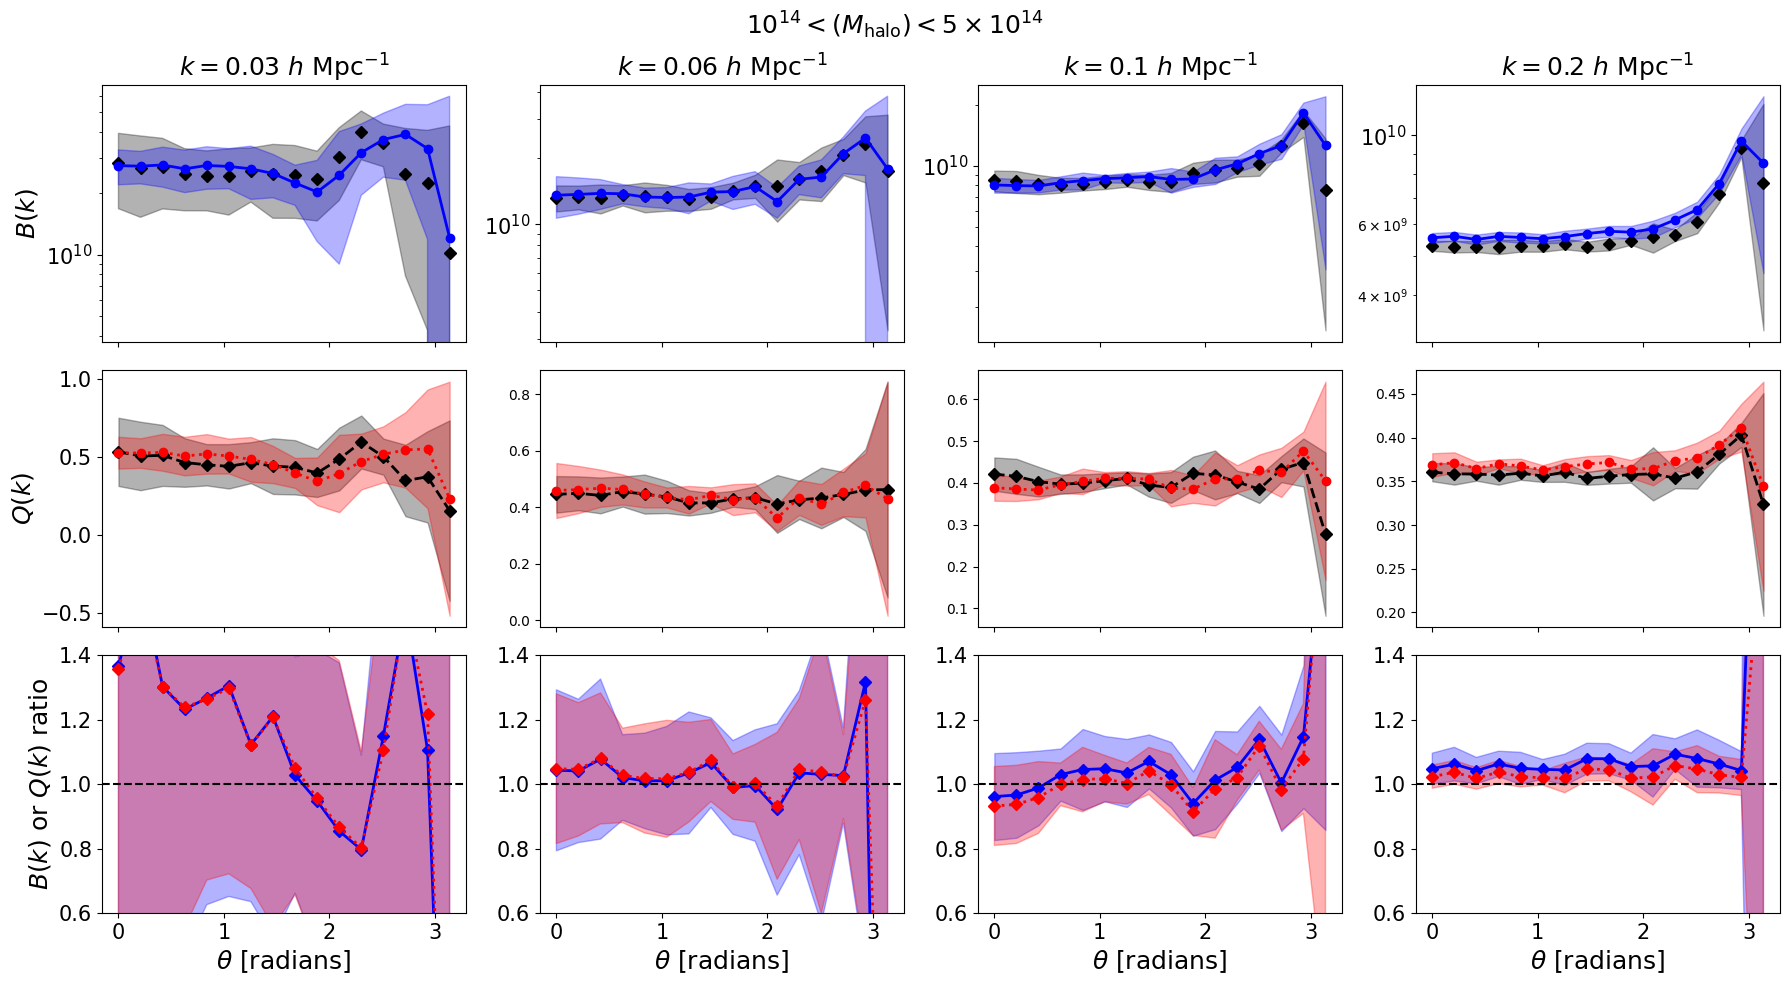

In [19]:
import matplotlib.pyplot as plt
jMb = 3
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 10), sharex=True)
fig.subplots_adjust(wspace=0.1, hspace=0.1)
axes[0,0].plot(theta, np.mean(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='', marker='D', lw=2.0)
axes[0,0].fill_between(theta, np.mean(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[0,0].plot(theta, np.mean(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0,0].fill_between(theta, np.mean(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[1,0].plot(theta, np.mean(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='--', marker='D', lw=2.0)
axes[1,0].fill_between(theta, np.mean(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[1,0].plot(theta, np.mean(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='r', ls=':', marker='o', lw=2.0)
axes[1,0].fill_between(theta, np.mean(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

axes[0,0].set_title(r'$k=0.03 \ h \ \mathrm{Mpc}^{-1}$', size=18)
# axes[0].set_ylim(1e3, 1e6)
axes[0,0].set_yscale('log')
# axes[0,0].legend(fontsize=16, loc='lower left')
axes[0,0].set_ylabel(r"$B(k)$", size=18)
axes[1,0].set_ylabel(r"$Q(k)$", size=18)
axes[0,0].tick_params(axis='both', labelsize=15)
axes[1,0].tick_params(axis='both', labelsize=15)

axes[2,0].plot(theta, np.mean(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='b', ls='-', marker='D', lw=2.0)
axes[2,0].fill_between(theta, np.mean(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[2,0].plot(theta, np.mean(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='r', ls=':', marker='D', lw=2.0)
axes[2,0].fill_between(theta, np.mean(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

# axes[1,0].legend(fontsize=16, loc='lower left')
axes[2,0].set_ylabel(r"$B(k)$ or $Q(k)$ ratio", size=18)
axes[2,0].axhline(1.0, ls='--', color='k')
axes[2,0].set_ylim(0.6, 1.4)
axes[2,0].tick_params(axis='both', labelsize=15)
axes[2,0].set_xlabel(r"$\theta$ [radians]", size=18)

axes[0,1].plot(theta, np.mean(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='', marker='D', lw=2.0)
axes[0,1].fill_between(theta, np.mean(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[0,1].plot(theta, np.mean(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0,1].fill_between(theta, np.mean(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[1,1].plot(theta, np.mean(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='--', marker='D', lw=2.0)
axes[1,1].fill_between(theta, np.mean(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[1,1].plot(theta, np.mean(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='r', ls=':', marker='o', lw=2.0)
axes[1,1].fill_between(theta, np.mean(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

axes[0,1].set_yscale('log')
# axes[0,1].legend(fontsize=16, loc='lower left')
axes[0,1].tick_params(axis='both', labelsize=15)
axes[0,1].set_title(r'$k=0.06 \ h \ \mathrm{Mpc}^{-1}$', size=18)
axes[2,1].plot(theta, np.mean(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='b', ls='-', marker='D', lw=2.0)
axes[2,1].fill_between(theta, np.mean(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[2,1].plot(theta, np.mean(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='r', ls=':', marker='D', lw=2.0)
axes[2,1].fill_between(theta, np.mean(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

# axes[1,1].legend(fontsize=16, loc='lower left')
axes[2,1].axhline(1.0, ls='--', color='k')
axes[2,1].set_ylim(0.6, 1.4)
axes[2,1].tick_params(axis='both', labelsize=15)
axes[2,1].set_xlabel(r"$\theta$ [radians]", size=18)

axes[0,2].plot(theta, np.mean(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='', marker='D', lw=2.0)
axes[0,2].fill_between(theta, np.mean(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[0,2].plot(theta, np.mean(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0,2].fill_between(theta, np.mean(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[1,2].plot(theta, np.mean(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='--', marker='D', lw=2.0)
axes[1,2].fill_between(theta, np.mean(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[1,2].plot(theta, np.mean(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='r', ls=':', marker='o', lw=2.0)
axes[1,2].fill_between(theta, np.mean(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

axes[0,2].set_yscale('log')
# axes[0,2].legend(fontsize=16, loc='lower left')

axes[0,2].tick_params(axis='both', labelsize=15)
axes[0,2].set_title(r'$k=0.1 \ h \ \mathrm{Mpc}^{-1}$', size=18)
axes[2,2].plot(theta, np.mean(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='b', ls='-', marker='D', lw=2.0)
axes[2,2].fill_between(theta, np.mean(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[2,2].plot(theta, np.mean(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='r', ls=':', marker='D', lw=2.0)
axes[2,2].fill_between(theta, np.mean(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

# axes[1,2].legend(fontsize=16, loc='lower left')
axes[2,2].axhline(1.0, ls='--', color='k')
axes[2,2].set_ylim(0.6, 1.4)
axes[2,2].tick_params(axis='both', labelsize=15)
axes[2,2].set_xlabel(r"$\theta$ [radians]", size=18)

axes[0,3].plot(theta, np.mean(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='', marker='D', lw=2.0)
axes[0,3].fill_between(theta, np.mean(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[0,3].plot(theta, np.mean(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0,3].fill_between(theta, np.mean(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[1,3].plot(theta, np.mean(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='--', marker='D', lw=2.0)
axes[1,3].fill_between(theta, np.mean(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[1,3].plot(theta, np.mean(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='r', ls=':', marker='o', lw=2.0)
axes[1,3].fill_between(theta, np.mean(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

axes[0,3].set_yscale('log')
# axes[0,3].legend(fontsize=16, loc='lower left')
axes[0,3].tick_params(axis='both', labelsize=15)
axes[0,3].set_title(r'$k=0.2 \ h \ \mathrm{Mpc}^{-1}$', size=18)
axes[2,3].plot(theta, np.mean(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='b', ls='-', marker='D', lw=2.0)
axes[2,3].fill_between(theta, np.mean(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[2,3].plot(theta, np.mean(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='r', ls=':', marker='D', lw=2.0)
axes[2,3].fill_between(theta, np.mean(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

# axes[1,3].legend(fontsize=16, loc='lower left')
axes[2,3].axhline(1.0, ls='--', color='k')
axes[2,3].set_ylim(0.6, 1.4)
axes[2,3].tick_params(axis='both', labelsize=15)
axes[2,3].set_xlabel(r"$\theta$ [radians]", size=18)


# axes[1].plot(k_Pk, np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth-voxelized', color='b', ls='--', marker='D', lw=2.0)
# axes[1].fill_between(k_Pk, np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:] - np.std(Pk_ratio_all_allsims, axis=0)[jMb,:], np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:] + np.std(Pk_ratio_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')
# axes[1].legend(fontsize=16, loc='lower left')
# axes[1].set_ylabel(r"$P(k)$ ratio", size=18)
# axes[1].axhline(1.0, ls='--', color='k')
# axes[1].set_ylim(0.6, 1.4)
# axes[1].tick_params(axis='both', labelsize=15)

# axes[2].plot(k_Pk, np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:], label='Truth-voxelized x AR-NPE', color='r', ls='--', marker='D', lw=2.0)
# axes[2].fill_between(k_Pk, np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:] - np.std(cross_corr_coeff_allsims, axis=0)[jMb,:], np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:] + np.std(cross_corr_coeff_allsims, axis=0)[jMb,:], alpha=0.3, color='r')
# axes[2].set_ylim(0.7, 1.3)
# axes[2].axhline(1.0, ls='--', color='k')
# axes[2].set_xscale('log')
# axes[2].legend(fontsize=16)
# axes[0].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
# axes[1].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
# axes[2].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
# axes[2].set_ylabel(r"Cross-coeff", size=18)
# axes[2].tick_params(axis='both', labelsize=15)
# axes[2].set_xlim(0.01, 0.4)
# plt.suptitle(str(Mmin_Pk) + r'$< \log(M) <$' + str(Mmax_Pk), size=20)
# pl.suptitle(r'$14.0 < \log_{10}(M_{\rm halo}) < 14.5$', size=18)
pl.suptitle(r'$10^{14} < (M_{\rm halo}) < 5 \times 10^{14}$', size=18)
plt.tight_layout()




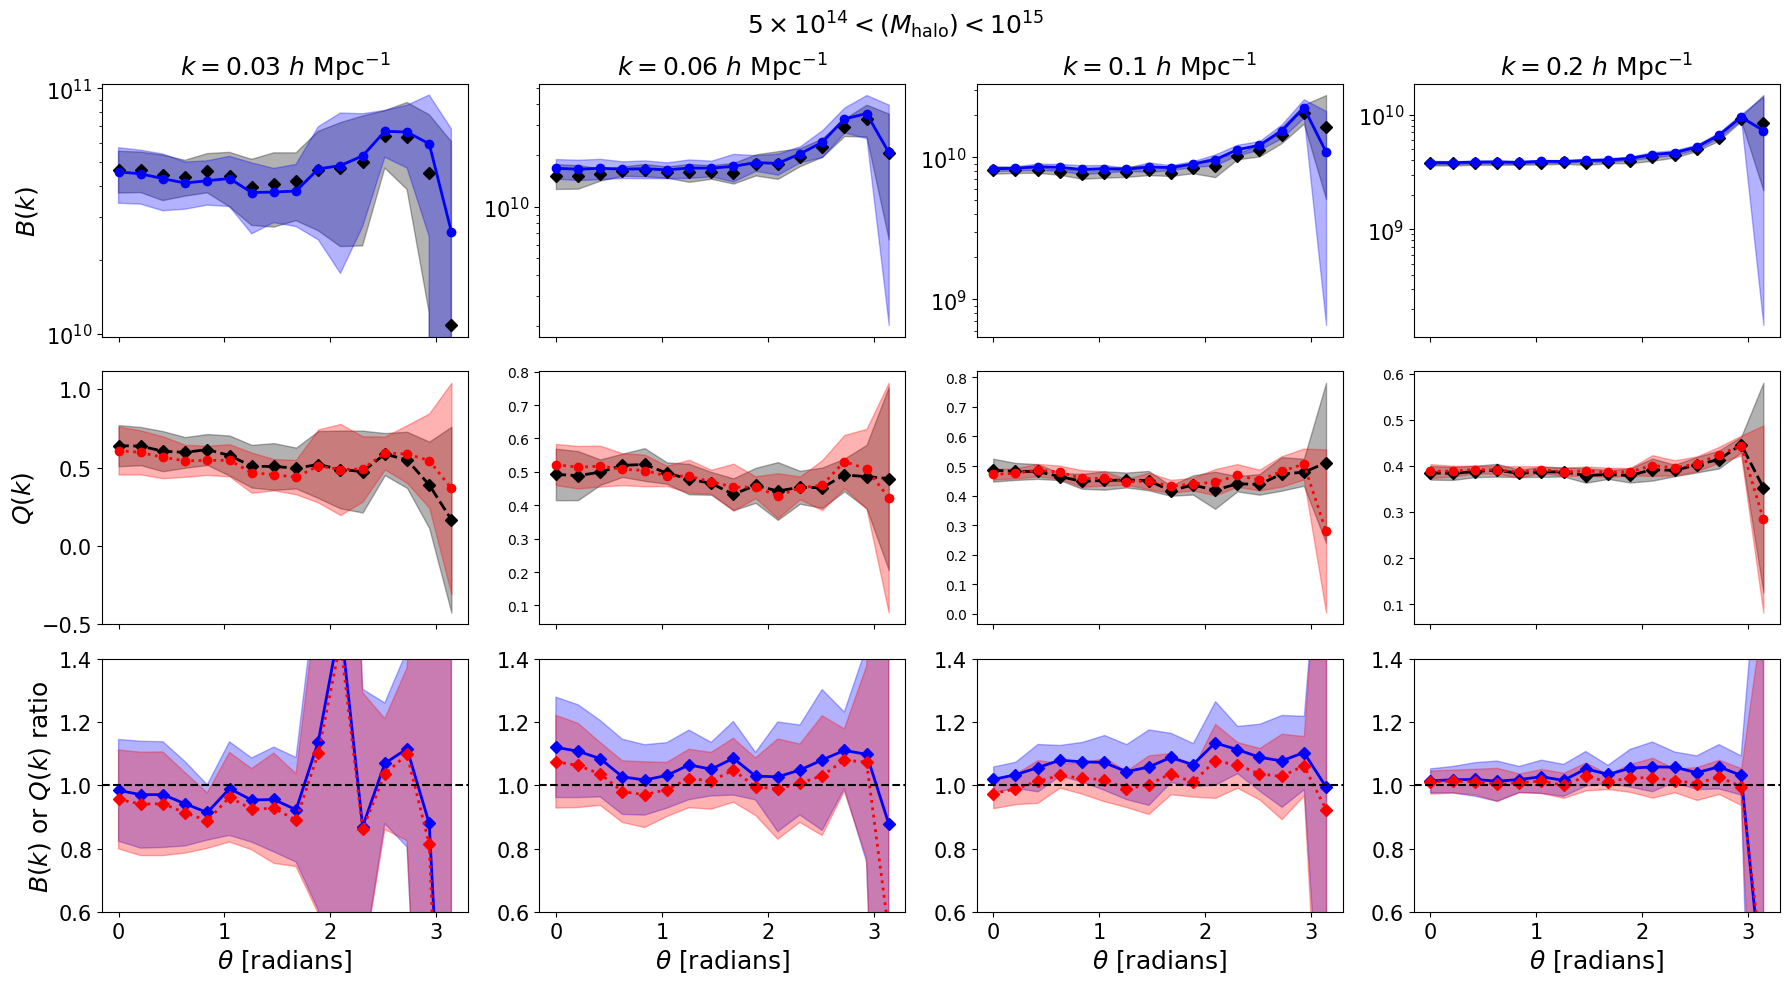

In [20]:
import matplotlib.pyplot as plt
jMb = 4
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 10), sharex=True)
fig.subplots_adjust(wspace=0.1, hspace=0.1)
axes[0,0].plot(theta, np.mean(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='', marker='D', lw=2.0)
axes[0,0].fill_between(theta, np.mean(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Bk_truth_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[0,0].plot(theta, np.mean(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0,0].fill_between(theta, np.mean(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Bk_mock_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[1,0].plot(theta, np.mean(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='--', marker='D', lw=2.0)
axes[1,0].fill_between(theta, np.mean(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Qk_truth_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[1,0].plot(theta, np.mean(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='r', ls=':', marker='o', lw=2.0)
axes[1,0].fill_between(theta, np.mean(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Qk_mock_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

axes[0,0].set_title(r'$k=0.03 \ h \ \mathrm{Mpc}^{-1}$', size=18)
# axes[0].set_ylim(1e3, 1e6)
axes[0,0].set_yscale('log')
# axes[0,0].legend(fontsize=16, loc='lower left')
axes[0,0].set_ylabel(r"$B(k)$", size=18)
axes[1,0].set_ylabel(r"$Q(k)$", size=18)
axes[0,0].tick_params(axis='both', labelsize=15)
axes[1,0].tick_params(axis='both', labelsize=15)

axes[2,0].plot(theta, np.mean(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='b', ls='-', marker='D', lw=2.0)
axes[2,0].fill_between(theta, np.mean(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Bk_ratio_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[2,0].plot(theta, np.mean(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='r', ls=':', marker='D', lw=2.0)
axes[2,0].fill_between(theta, np.mean(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:] - np.std(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:], np.mean(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:] + np.std(Qk_ratio_k0p03_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

# axes[1,0].legend(fontsize=16, loc='lower left')
axes[2,0].set_ylabel(r"$B(k)$ or $Q(k)$ ratio", size=18)
axes[2,0].axhline(1.0, ls='--', color='k')
axes[2,0].set_ylim(0.6, 1.4)
axes[2,0].tick_params(axis='both', labelsize=15)
axes[2,0].set_xlabel(r"$\theta$ [radians]", size=18)

axes[0,1].plot(theta, np.mean(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='', marker='D', lw=2.0)
axes[0,1].fill_between(theta, np.mean(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Bk_truth_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[0,1].plot(theta, np.mean(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0,1].fill_between(theta, np.mean(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Bk_mock_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[1,1].plot(theta, np.mean(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='--', marker='D', lw=2.0)
axes[1,1].fill_between(theta, np.mean(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Qk_truth_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[1,1].plot(theta, np.mean(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='r', ls=':', marker='o', lw=2.0)
axes[1,1].fill_between(theta, np.mean(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Qk_mock_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

axes[0,1].set_yscale('log')
# axes[0,1].legend(fontsize=16, loc='lower left')
axes[0,1].tick_params(axis='both', labelsize=15)
axes[0,1].set_title(r'$k=0.06 \ h \ \mathrm{Mpc}^{-1}$', size=18)
axes[2,1].plot(theta, np.mean(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='b', ls='-', marker='D', lw=2.0)
axes[2,1].fill_between(theta, np.mean(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Bk_ratio_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[2,1].plot(theta, np.mean(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='r', ls=':', marker='D', lw=2.0)
axes[2,1].fill_between(theta, np.mean(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:] - np.std(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:], np.mean(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:] + np.std(Qk_ratio_k0p06_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

# axes[1,1].legend(fontsize=16, loc='lower left')
axes[2,1].axhline(1.0, ls='--', color='k')
axes[2,1].set_ylim(0.6, 1.4)
axes[2,1].tick_params(axis='both', labelsize=15)
axes[2,1].set_xlabel(r"$\theta$ [radians]", size=18)

axes[0,2].plot(theta, np.mean(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='', marker='D', lw=2.0)
axes[0,2].fill_between(theta, np.mean(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Bk_truth_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[0,2].plot(theta, np.mean(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0,2].fill_between(theta, np.mean(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Bk_mock_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[1,2].plot(theta, np.mean(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='--', marker='D', lw=2.0)
axes[1,2].fill_between(theta, np.mean(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Qk_truth_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[1,2].plot(theta, np.mean(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='r', ls=':', marker='o', lw=2.0)
axes[1,2].fill_between(theta, np.mean(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Qk_mock_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

axes[0,2].set_yscale('log')
# axes[0,2].legend(fontsize=16, loc='lower left')

axes[0,2].tick_params(axis='both', labelsize=15)
axes[0,2].set_title(r'$k=0.1 \ h \ \mathrm{Mpc}^{-1}$', size=18)
axes[2,2].plot(theta, np.mean(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='b', ls='-', marker='D', lw=2.0)
axes[2,2].fill_between(theta, np.mean(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Bk_ratio_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[2,2].plot(theta, np.mean(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='r', ls=':', marker='D', lw=2.0)
axes[2,2].fill_between(theta, np.mean(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:] - np.std(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:], np.mean(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:] + np.std(Qk_ratio_k0p1_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

# axes[1,2].legend(fontsize=16, loc='lower left')
axes[2,2].axhline(1.0, ls='--', color='k')
axes[2,2].set_ylim(0.6, 1.4)
axes[2,2].tick_params(axis='both', labelsize=15)
axes[2,2].set_xlabel(r"$\theta$ [radians]", size=18)

axes[0,3].plot(theta, np.mean(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='', marker='D', lw=2.0)
axes[0,3].fill_between(theta, np.mean(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[0,3].plot(theta, np.mean(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='b', ls='-', marker='o', lw=2.0)
axes[0,3].fill_between(theta, np.mean(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[1,3].plot(theta, np.mean(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:], label='Truth', color='k', ls='--', marker='D', lw=2.0)
axes[1,3].fill_between(theta, np.mean(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Qk_truth_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='k')

axes[1,3].plot(theta, np.mean(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:], label='AR-NPE', color='r', ls=':', marker='o', lw=2.0)
axes[1,3].fill_between(theta, np.mean(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Qk_mock_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

axes[0,3].set_yscale('log')
# axes[0,3].legend(fontsize=16, loc='lower left')
axes[0,3].tick_params(axis='both', labelsize=15)
axes[0,3].set_title(r'$k=0.2 \ h \ \mathrm{Mpc}^{-1}$', size=18)
axes[2,3].plot(theta, np.mean(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='b', ls='-', marker='D', lw=2.0)
axes[2,3].fill_between(theta, np.mean(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Bk_ratio_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')

axes[2,3].plot(theta, np.mean(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth', color='r', ls=':', marker='D', lw=2.0)
axes[2,3].fill_between(theta, np.mean(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:] - np.std(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:], np.mean(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:] + np.std(Qk_ratio_k0p2_all_allsims, axis=0)[jMb,:], alpha=0.3, color='r')

# axes[1,3].legend(fontsize=16, loc='lower left')
axes[2,3].axhline(1.0, ls='--', color='k')
axes[2,3].set_ylim(0.6, 1.4)
axes[2,3].tick_params(axis='both', labelsize=15)
axes[2,3].set_xlabel(r"$\theta$ [radians]", size=18)


# axes[1].plot(k_Pk, np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:], label='AR-NPE/Truth-voxelized', color='b', ls='--', marker='D', lw=2.0)
# axes[1].fill_between(k_Pk, np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:] - np.std(Pk_ratio_all_allsims, axis=0)[jMb,:], np.mean(Pk_ratio_all_allsims, axis=0)[jMb,:] + np.std(Pk_ratio_all_allsims, axis=0)[jMb,:], alpha=0.3, color='b')
# axes[1].legend(fontsize=16, loc='lower left')
# axes[1].set_ylabel(r"$P(k)$ ratio", size=18)
# axes[1].axhline(1.0, ls='--', color='k')
# axes[1].set_ylim(0.6, 1.4)
# axes[1].tick_params(axis='both', labelsize=15)

# axes[2].plot(k_Pk, np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:], label='Truth-voxelized x AR-NPE', color='r', ls='--', marker='D', lw=2.0)
# axes[2].fill_between(k_Pk, np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:] - np.std(cross_corr_coeff_allsims, axis=0)[jMb,:], np.mean(cross_corr_coeff_allsims, axis=0)[jMb,:] + np.std(cross_corr_coeff_allsims, axis=0)[jMb,:], alpha=0.3, color='r')
# axes[2].set_ylim(0.7, 1.3)
# axes[2].axhline(1.0, ls='--', color='k')
# axes[2].set_xscale('log')
# axes[2].legend(fontsize=16)
# axes[0].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
# axes[1].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
# axes[2].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=18)
# axes[2].set_ylabel(r"Cross-coeff", size=18)
# axes[2].tick_params(axis='both', labelsize=15)
# axes[2].set_xlim(0.01, 0.4)
# plt.suptitle(str(Mmin_Pk) + r'$< \log(M) <$' + str(Mmax_Pk), size=20)
# pl.suptitle(r'$14.5 < \log_{10}(M_{\rm halo}) < 15.0$', size=18)
pl.suptitle(r'$5\times 10^{14} < (M_{\rm halo}) < 10^{15}$', size=18)
plt.tight_layout()




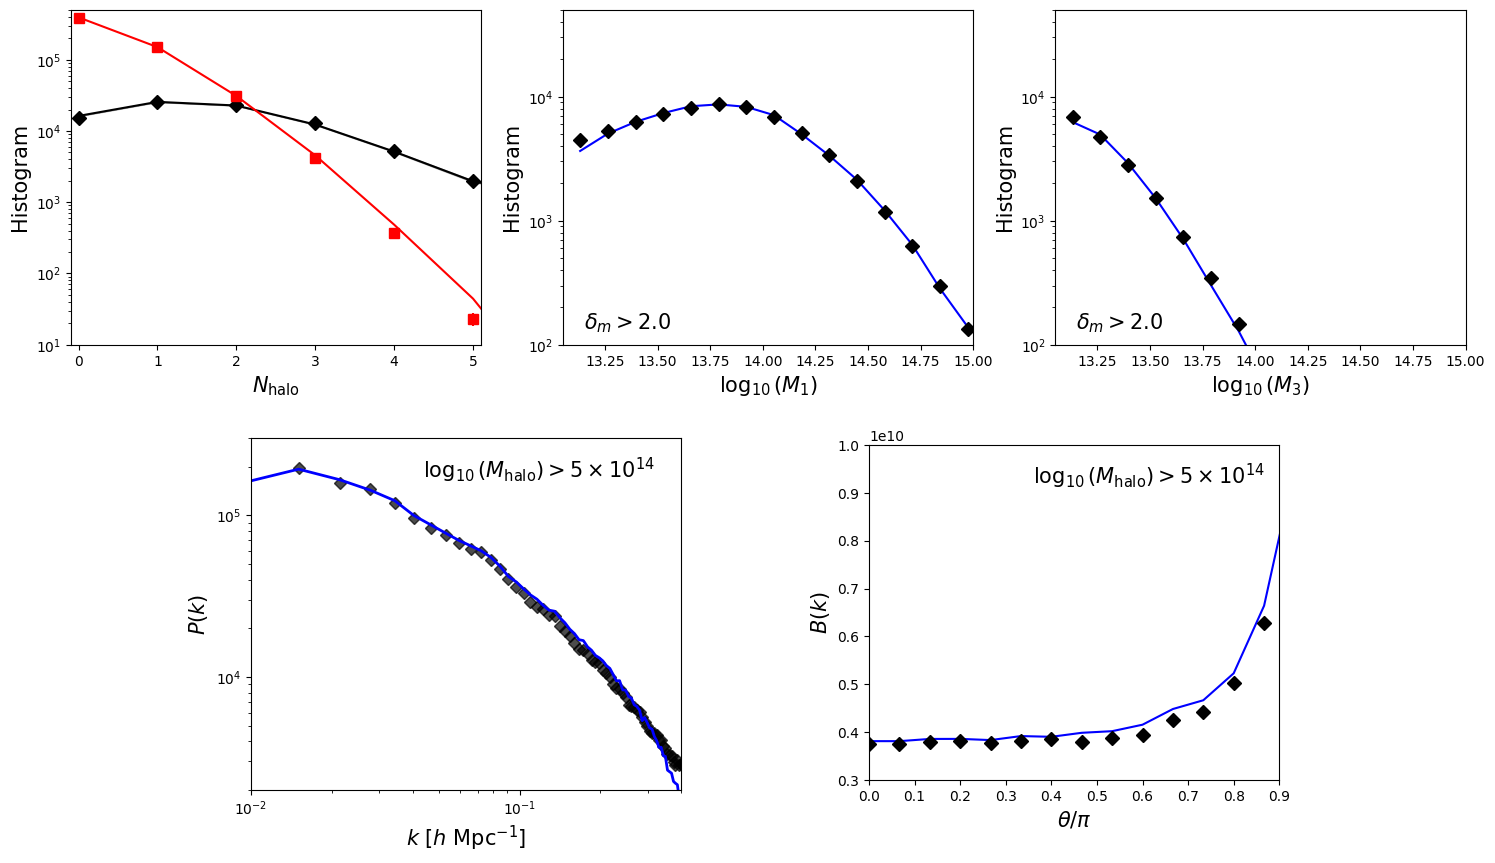

In [22]:
# make a five panel figure:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharex=False)
fig.subplots_adjust(wspace=0.2, hspace=0.3)
# axes[0,0].plot()
axes[0,0].errorbar(bin_cents_Nhalo, np.mean(hist_truth_high_Nhalo_allsims, axis=0), np.std(hist_truth_high_Nhalo_allsims, axis=0),  ls='', marker='D', ms=7, color='k', label='truth')
axes[0,0].plot(bin_cents_Nhalo, np.mean(hist_mock_high_Nhalo_allsims, axis=0), color='k', label='mock')
axes[0,0].fill_between(bin_cents_Nhalo, np.mean(hist_mock_high_Nhalo_allsims, axis=0) - np.std(hist_mock_high_Nhalo_allsims, axis=0), np.mean(hist_mock_high_Nhalo_allsims, axis=0) + np.std(hist_mock_high_Nhalo_allsims, axis=0), alpha=0.3, color='k')


axes[0,0].errorbar(bin_cents_Nhalo, np.mean(hist_truth_mid_Nhalo_allsims, axis=0), np.std(hist_truth_mid_Nhalo_allsims, axis=0),  ls='', marker='s', ms=7, color='red', label='truth')
axes[0,0].plot(bin_cents_Nhalo, np.mean(hist_mock_mid_Nhalo_allsims, axis=0), color='red', label='mock')

axes[0,0].set_yscale('log')
axes[0,0].set_xlim(-0.1,5.1)
axes[0,0].set_ylim(1e1, 5e5)
axes[0,0].set_xlabel(r"$N_{\rm halo}$", size=15)
axes[0,0].set_ylabel('Histogram', size=15)
# insert text inside the panel
# axes[0,0].text(0.05, 0.1, r'$\delta_m > 2.0$', transform=axes[0,0].transAxes, fontsize=15, verticalalignment='top')
# axes[0,0].s

jM = 0
axes[0,1].errorbar(bin_cents_Mhalo, np.mean(hist_truth_high_Mhalo_allsims, axis=0)[jM,:], ls='', marker='D', ms=7, color='k', label='truth')
axes[0,1].plot(bin_cents_Mhalo, np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], color='b', label='mock')
axes[0,1].set_yscale('log')
axes[0,1].set_xlim(13.05, 15.0)
axes[0,1].set_ylim(1e2, 5e4)
axes[0,1].set_xlabel(r"$\log_{10}(M_1)$", size=15)
# axes[0,1].set_ylabel('Histogram', size=15)
axes[0,1].set_ylabel('Histogram', size=15)
axes[0,1].text(0.05, 0.1, r'$\delta_m > 2.0$', transform=axes[0,1].transAxes, fontsize=15, verticalalignment='top')

jM = 2
axes[0,2].errorbar(bin_cents_Mhalo, np.mean(hist_truth_high_Mhalo_allsims, axis=0)[jM,:], ls='', marker='D', ms=7, color='k', label='truth')
axes[0,2].plot(bin_cents_Mhalo, np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], color='b', label='mock')
axes[0,2].set_yscale('log')
axes[0,2].set_xlim(13.05, 15.0)
axes[0,2].set_ylim(1e2, 5e4)
axes[0,2].set_xlabel(r"$\log_{10}(M_3)$", size=15)
# axes[0,2].set_ylabel('Histogram', size=15)
axes[0,2].set_ylabel('Histogram', size=15)
axes[0,2].text(0.05, 0.1, r'$\delta_m > 2.0$', transform=axes[0,2].transAxes, fontsize=15, verticalalignment='top')

# indselk = (np.exp(np.log(np.arange(1 + len(k_Pk)))[::5])).astype(int)
indselk = np.arange(len(k_Pk))
axes[1,0].plot(k_Pk[indselk], np.mean(Pk_truth_all_allsims, axis=0)[jMb,indselk], label='Truth-voxelized', color='k', ls='', marker='D', lw=2.0, alpha=0.7)
axes[1,0].plot(k_Pk[indselk], np.mean(Pk_mock_all_allsims, axis=0)[jMb,indselk], label='AR-NPE', color='b', ls='-', marker='', lw=2.0)
axes[1,0].set_yscale('log')
axes[1,0].set_xscale('log')
axes[1,0].set_ylim(2e3, 3e5)
axes[1,0].set_xlim(0.01, 0.4)
axes[1,0].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=15)
axes[1,0].set_ylabel(r"$P(k)$", size=15)
axes[1,0].text(0.4, 0.95, r'$\log_{10}(M_{\rm halo}) > 5\times 10^{14}$', transform=axes[1,0].transAxes, fontsize=15, verticalalignment='top')

axes[1,1].errorbar(theta/np.pi, np.mean(Bk_truth_k0p2_all_allsims, axis=0)[jMb,:], ls='', marker='D', ms=7, color='k', label='truth')
axes[1,1].plot(theta/np.pi, np.mean(Bk_mock_k0p2_all_allsims, axis=0)[jMb,:], color='b', label='mock')
# axes[0,1].set_yscale('log')
axes[1,1].set_xlim(0,0.9)
axes[1,1].set_ylim(0.3e10, 1.0e10)
axes[1,1].set_xlabel(r"$\theta/\pi$ ", size=15)
axes[1,1].set_ylabel(r"$B(k)$", size=15)
axes[1,1].text(0.4, 0.95, r'$\log_{10}(M_{\rm halo}) > 5\times 10^{14}$', transform=axes[1,1].transAxes, fontsize=15, verticalalignment='top')
# delete the last panel
axes[1,2].axis('off')

# center the last two panel in the bottom row
pos1 = axes[1,0].get_position() # get the original position
pos2 = [pos1.x0 + 0.1, pos1.y0-0.01,  1.05*pos1.width, 1.05*pos1.height]
axes[1,0].set_position(pos2) # set a new position


# center the last two panel in the bottom row
pos1 = axes[1,1].get_position() # get the original position
pos2 = [pos1.x0 + 0.17, pos1.y0,  pos1.width, pos1.height]
axes[1,1].set_position(pos2) # set a new position
# plt.tight_layout()
# plt.savefig('fig1.pdf', bbox_inches='tight')




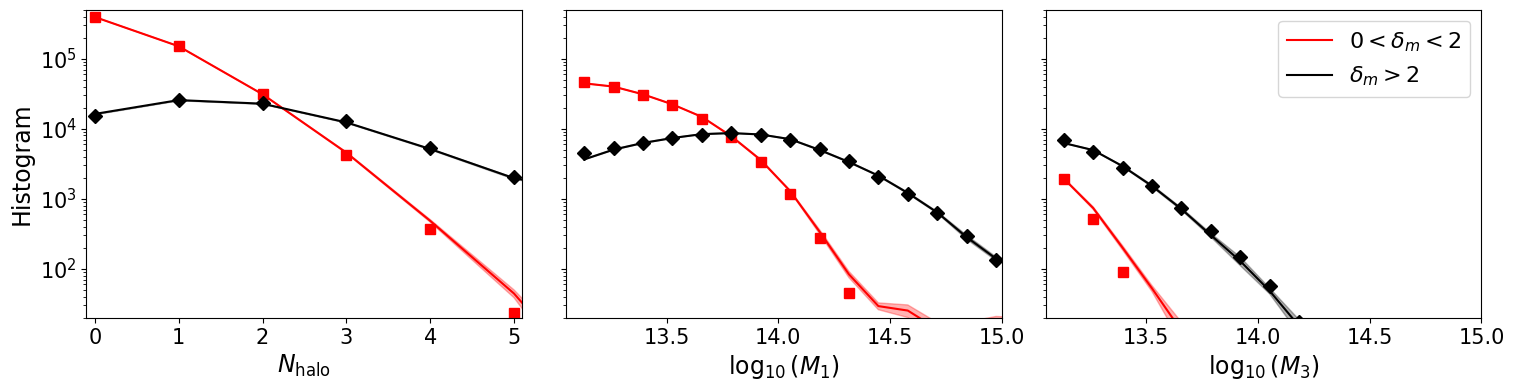

In [30]:
# make a five panel figure:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), sharey='row')
fig.subplots_adjust(wspace=0.1, hspace=0.3)
# axes[0,0].plot()
axes[0].errorbar(bin_cents_Nhalo, np.mean(hist_truth_mid_Nhalo_allsims, axis=0), np.std(hist_truth_mid_Nhalo_allsims, axis=0),  ls='', marker='s', ms=7, color='red', label='truth')
axes[0].plot(bin_cents_Nhalo, np.mean(hist_mock_mid_Nhalo_allsims, axis=0), color='red', label='mock')
axes[0].fill_between(bin_cents_Nhalo, np.mean(hist_mock_mid_Nhalo_allsims, axis=0) - np.std(hist_mock_mid_Nhalo_allsims, axis=0), np.mean(hist_mock_mid_Nhalo_allsims, axis=0) + np.std(hist_mock_mid_Nhalo_allsims, axis=0), alpha=0.3, color='r')


axes[0].errorbar(bin_cents_Nhalo, np.mean(hist_truth_high_Nhalo_allsims, axis=0), np.std(hist_truth_high_Nhalo_allsims, axis=0),  ls='', marker='D', ms=7, color='k', label='truth')
axes[0].plot(bin_cents_Nhalo, np.mean(hist_mock_high_Nhalo_allsims, axis=0), color='k', label='mock')
axes[0].fill_between(bin_cents_Nhalo, np.mean(hist_mock_high_Nhalo_allsims, axis=0) - np.std(hist_mock_high_Nhalo_allsims, axis=0), np.mean(hist_mock_high_Nhalo_allsims, axis=0) + np.std(hist_mock_high_Nhalo_allsims, axis=0), alpha=0.3, color='k')

axes[0].set_yscale('log')
axes[0].set_xlim(-0.1,5.1)
axes[0].set_ylim(2e1, 5e5)
axes[0].set_xlabel(r"$N_{\rm halo}$", size=17)
axes[0].set_ylabel('Histogram', size=17)
# set tick label sizes:
axes[0].tick_params(axis='both', labelsize=15)

# insert text inside the panel
# axes[0,0].text(0.05, 0.1, r'$\delta_m > 2.0$', transform=axes[0,0].transAxes, fontsize=15, verticalalignment='top')
# axes[0,0].s

jM = 0
axes[1].errorbar(bin_cents_Mhalo, np.mean(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:],np.std(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:], ls='', marker='s', ms=7, color='red', label='truth')
axes[1].plot(bin_cents_Mhalo, np.mean(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:], color='red', label='mock')
axes[1].fill_between(bin_cents_Mhalo, np.mean(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:], alpha=0.3, color='r')

axes[1].errorbar(bin_cents_Mhalo, np.mean(hist_truth_high_Mhalo_allsims, axis=0)[jM,:],np.std(hist_truth_high_Mhalo_allsims, axis=0)[jM,:], ls='', marker='D', ms=7, color='k', label='truth')
axes[1].plot(bin_cents_Mhalo, np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], color='k', label='mock')
axes[1].fill_between(bin_cents_Mhalo, np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], alpha=0.3, color='k')


axes[1].set_yscale('log')
axes[1].set_xlim(13.05, 15.0)
# axes[1].set_ylim(1e2, 5e4)
axes[1].set_xlabel(r"$\log_{10}(M_1)$", size=17)
axes[1].tick_params(axis='both', labelsize=15)
# axes[0,1].set_ylabel('Histogram', size=15)
# axes[1].set_ylabel('Histogram', size=15)
# axes[1].text(0.05, 0.1, r'$\delta_m > 2.0$', transform=axes[0,1].transAxes, fontsize=15, verticalalignment='top')

jM = 2
axes[2].errorbar(bin_cents_Mhalo, np.mean(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:],np.std(hist_truth_mid_Mhalo_allsims, axis=0)[jM,:], ls='', marker='s', ms=7, color='red')
axes[2].plot(bin_cents_Mhalo, np.mean(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:], color='red', label=r'$0 < \delta_m < 2$')
axes[2].fill_between(bin_cents_Mhalo, np.mean(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_mid_Mhalo_allsims, axis=0)[jM,:], alpha=0.3, color='r')

axes[2].errorbar(bin_cents_Mhalo, np.mean(hist_truth_high_Mhalo_allsims, axis=0)[jM,:],np.std(hist_truth_high_Mhalo_allsims, axis=0)[jM,:], ls='', marker='D', ms=7, color='k')
axes[2].plot(bin_cents_Mhalo, np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], color='k', label=r'$\delta_m > 2$')
axes[2].fill_between(bin_cents_Mhalo, np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:] - np.std(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], np.mean(hist_mock_high_Mhalo_allsims, axis=0)[jM,:] + np.std(hist_mock_high_Mhalo_allsims, axis=0)[jM,:], alpha=0.3, color='k')

axes[2].set_yscale('log')
axes[2].set_xlim(13.05, 15.0)
# axes[2].set_ylim(1e2, 5e4)
axes[2].set_xlabel(r"$\log_{10}(M_3)$", size=17)
axes[2].legend(fontsize=16, loc='upper right')
axes[2].tick_params(axis='both', labelsize=15)
# axes[0,2].set_ylabel('Histogram', size=15)

plt.savefig('fig1.pdf', bbox_inches='tight')



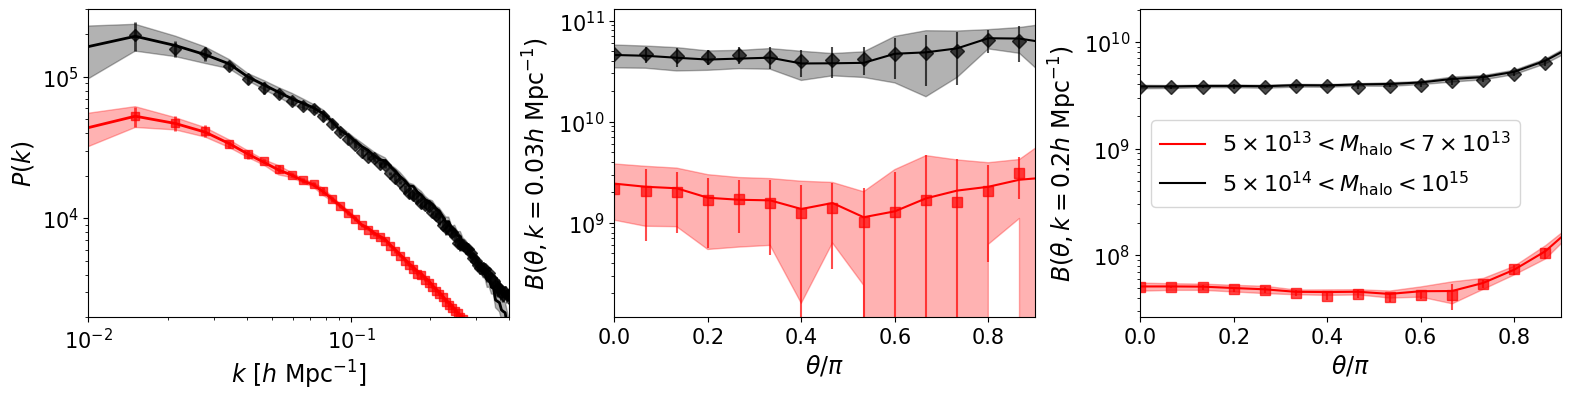

In [34]:
# make a five panel figure:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(19, 4))
fig.subplots_adjust(wspace=0.25, hspace=0.3)

indselk = np.arange(len(k_Pk))
axes[0].errorbar(k_Pk[indselk], np.mean(Pk_truth_all_allsims, axis=0)[1,indselk],np.std(Pk_truth_all_allsims, axis=0)[1,indselk], label='Truth-voxelized', color='r', ls='', marker='s', lw=2.0, alpha=0.7)
axes[0].plot(k_Pk[indselk], np.mean(Pk_mock_all_allsims, axis=0)[1,indselk], label='AR-NPE', color='r', ls='-', marker='', lw=2.0)
axes[0].fill_between(k_Pk[indselk], np.mean(Pk_mock_all_allsims, axis=0)[1,indselk] - np.std(Pk_mock_all_allsims, axis=0)[1,indselk], np.mean(Pk_mock_all_allsims, axis=0)[1,indselk] + np.std(Pk_mock_all_allsims, axis=0)[1,indselk], alpha=0.3, color='r')

axes[0].errorbar(k_Pk[indselk], np.mean(Pk_truth_all_allsims, axis=0)[4,indselk], np.std(Pk_truth_all_allsims, axis=0)[4,indselk], label='Truth-voxelized', color='k', ls='', marker='D', lw=2.0, alpha=0.7)
axes[0].plot(k_Pk[indselk], np.mean(Pk_mock_all_allsims, axis=0)[4,indselk], label='AR-NPE', color='k', ls='-', marker='', lw=2.0)
axes[0].fill_between(k_Pk[indselk], np.mean(Pk_mock_all_allsims, axis=0)[4,indselk] - np.std(Pk_mock_all_allsims, axis=0)[4,indselk], np.mean(Pk_mock_all_allsims, axis=0)[4,indselk] + np.std(Pk_mock_all_allsims, axis=0)[4,indselk], alpha=0.3, color='k')

axes[0].set_yscale('log')
axes[0].set_xscale('log')
axes[0].tick_params(axis='both', labelsize=15)
axes[0].set_ylim(2e3, 3e5)
axes[0].set_xlim(0.01, 0.4)
axes[0].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", size=17)
axes[0].set_ylabel(r"$P(k)$", size=17)
# axes[0].text(0.4, 0.95, r'$\log_{10}(M_{\rm halo}) > 5\times 10^{14}$', transform=axes[1,0].transAxes, fontsize=15, verticalalignment='top')

axes[1].errorbar(theta/np.pi, np.mean(Bk_truth_k0p03_all_allsims, axis=0)[1,:],np.std(Bk_truth_k0p03_all_allsims, axis=0)[1,:], ls='', marker='s', ms=7, color='r', alpha=0.7)
axes[1].plot(theta/np.pi, np.mean(Bk_mock_k0p03_all_allsims, axis=0)[1,:], color='r', label=r'$5\times 10^{13} < M_{\rm halo} < 7\times 10^{13}$')
axes[1].fill_between(theta/np.pi, np.mean(Bk_mock_k0p03_all_allsims, axis=0)[1,:] - np.std(Bk_mock_k0p03_all_allsims, axis=0)[1,:], np.mean(Bk_mock_k0p03_all_allsims, axis=0)[1,:] + np.std(Bk_mock_k0p03_all_allsims, axis=0)[1,:], alpha=0.3, color='r')

axes[1].errorbar(theta/np.pi, np.mean(Bk_truth_k0p03_all_allsims, axis=0)[4,:],np.std(Bk_truth_k0p03_all_allsims, axis=0)[4,:], ls='', marker='D', ms=7, color='k', alpha=0.7)
axes[1].plot(theta/np.pi, np.mean(Bk_mock_k0p03_all_allsims, axis=0)[4,:], color='k', label=r'$5\times 10^{14} < M_{\rm halo} < 10^{15}$')
axes[1].fill_between(theta/np.pi, np.mean(Bk_mock_k0p03_all_allsims, axis=0)[4,:] - np.std(Bk_mock_k0p03_all_allsims, axis=0)[4,:], np.mean(Bk_mock_k0p03_all_allsims, axis=0)[4,:] + np.std(Bk_mock_k0p03_all_allsims, axis=0)[4,:], alpha=0.3, color='k')

axes[1].set_yscale('log')
axes[1].set_xlim(0,0.9)
# axes[1].set_ylim(0.3e10, 1.0e10)
axes[1].set_xlabel(r"$\theta/\pi$ ", size=17)
axes[1].set_ylabel(r"$B(\theta, k=0.03 h \ \mathrm{Mpc}^{-1})$", size=17)
axes[1].tick_params(axis='both', labelsize=15)

axes[2].errorbar(theta/np.pi, np.mean(Bk_truth_k0p2_all_allsims, axis=0)[1,:],np.std(Bk_truth_k0p2_all_allsims, axis=0)[1,:], ls='', marker='s', ms=7, color='r', alpha=0.7)
axes[2].plot(theta/np.pi, np.mean(Bk_mock_k0p2_all_allsims, axis=0)[1,:], color='r', label=r'$5\times 10^{13} < M_{\rm halo} < 7\times 10^{13}$')
axes[2].fill_between(theta/np.pi, np.mean(Bk_mock_k0p2_all_allsims, axis=0)[1,:] - np.std(Bk_mock_k0p2_all_allsims, axis=0)[1,:], np.mean(Bk_mock_k0p2_all_allsims, axis=0)[1,:] + np.std(Bk_mock_k0p2_all_allsims, axis=0)[1,:], alpha=0.3, color='r')

axes[2].errorbar(theta/np.pi, np.mean(Bk_truth_k0p2_all_allsims, axis=0)[4,:],np.std(Bk_truth_k0p2_all_allsims, axis=0)[4,:], ls='', marker='D', ms=7, color='k', alpha=0.7)
axes[2].plot(theta/np.pi, np.mean(Bk_mock_k0p2_all_allsims, axis=0)[4,:], color='k', label=r'$5\times 10^{14} < M_{\rm halo} < 10^{15}$')
axes[2].fill_between(theta/np.pi, np.mean(Bk_mock_k0p2_all_allsims, axis=0)[4,:] - np.std(Bk_mock_k0p2_all_allsims, axis=0)[4,:], np.mean(Bk_mock_k0p2_all_allsims, axis=0)[4,:] + np.std(Bk_mock_k0p2_all_allsims, axis=0)[4,:], alpha=0.3, color='k')

axes[2].set_yscale('log')
axes[2].set_xlim(0,0.9)
# axes[1].set_ylim(0.3e10, 1.0e10)
axes[2].set_xlabel(r"$\theta/\pi$ ", size=17)
axes[2].set_ylabel(r"$B(\theta, k=0.2 h \ \mathrm{Mpc}^{-1})$", size=17)
axes[2].legend(fontsize=16, loc='center left')
axes[2].tick_params(axis='both', labelsize=15)
# axes[1].text(0.4, 0.95, r'$\log_{10}(M_{\rm halo}) > 5\times 10^{14}$', transform=axes[1,1].transAxes, fontsize=15, verticalalignment='top')
# delete the last panel
# axes[2].axis('off')

# # center the last two panel in the bottom row
# pos1 = axes[1,0].get_position() # get the original position
# pos2 = [pos1.x0 + 0.1, pos1.y0-0.01,  1.05*pos1.width, 1.05*pos1.height]
# axes[1,0].set_position(pos2) # set a new position


# # center the last two panel in the bottom row
# pos1 = axes[1,1].get_position() # get the original position
# pos2 = [pos1.x0 + 0.17, pos1.y0,  pos1.width, pos1.height]
# axes[1,1].set_position(pos2) # set a new position
# # plt.tight_layout()
plt.savefig('fig2.pdf', bbox_inches='tight')


